In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # Seaborn desaturates matplotlib colors (this is useful if you use both seaborn and basic matplot lib and want colors to be consistent)
import scipy.stats as stats
sns.set(palette='husl', context = 'paper', style='white', font_scale=1)

import os
import scikit_posthocs as sp
from pybedtools import BedTool
import pybedtools
from upsetplot import plot, from_indicators
import pysam
import json
import re
import random


ModuleNotFoundError: No module named 'scikit_posthocs'

In [2]:
BASE_PATH = "/".join(os.getcwd().split("/")) # base directory level


#Wynton
# BIN_PATH = os.path.join(BASE_PATH, "bin")  # where my scripts live
# DATA_PATH = os.path.join(BASE_PATH, "data")  # where I dump new data 
# RESULTS_PATH = os.path.join(BASE_PATH, "results")  # where I analyze results

# SRC_PATH = os.path.join(BASE_PATH, "src")  # where any packages needed to run analyses live. I haven't started structuring things this way yet. 

# COMP_PATH = os.path.join(DATA_PATH,"pairwise/hsmrca")
# COMP_PATH = os.path.join(DATA_PATH,"pairwise/reference")

# EXP_PATH = os.path.join(RESULTS_PATH, "expectedDiv")
# Local

DATA_PATH = os.path.join(BASE_PATH, "../../../dowloads/")  # where I dump new data
COMP_PATH = os.path.join(DATA_PATH,"1KGvsHSMRCA")

In [3]:
BASE_PATH

'/wynton/group/capra/projects/modern_human_3Dgenome'

# Scatter plot by windows

In [4]:


# ancestral 3D dataframes
anc_spear = pd.read_table('%s/comp_tables/anc_window_spearman.csv' % RESULTS_PATH
                    , sep=',', header=[0,1,2,3], index_col=[0,1])
anc_div = 1-anc_spear
windows_to_keep = anc_div.index
anc_div = anc_div.dropna(axis=1)

anc = pd.read_table('%s/comp_tables/anc_genomewide_averages.csv' % RESULTS_PATH,
                    sep=',', index_col=0)
drops = anc[np.isnan(anc.genome_avg_mse)].index
anc = anc.drop(index=drops)
anc['divergence'] = 1-anc.genome_avg_spearman
windows_to_keep.to_frame(index=False).to_csv('%s/intermediates/windows_to_keep.csv' % DATA_PATH)

In [5]:
anc

,ancestor,genome_avg_mse,genome_avg_spearman,super_pop,sub_pop,sex,id,divergence
1KG,,,,,,,,
AFR_ACB_female_HG01880,hsmrca_ancestral,0.000654,0.995720,AFR,ACB,female,HG01880,0.004280
AFR_ACB_female_HG01883,hsmrca_ancestral,0.000688,0.995387,AFR,ACB,female,HG01883,0.004613
AFR_ACB_female_HG01886,hsmrca_ancestral,0.000680,0.995517,AFR,ACB,female,HG01886,0.004483
AFR_ACB_female_HG01889,hsmrca_ancestral,0.000709,0.995272,AFR,ACB,female,HG01889,0.004728
AFR_ACB_female_HG01894,hsmrca_ancestral,0.000683,0.995589,AFR,ACB,female,HG01894,0.004411
...,...,...,...,...,...,...,...,...
SAS_STU_male_HG04039,hsmrca_ancestral,0.000642,0.995748,SAS,STU,male,HG04039,0.004252
SAS_STU_male_HG04100,hsmrca_ancestral,0.000664,0.995672,SAS,STU,male,HG04100,0.004328
SAS_STU_male_HG04107,hsmrca_ancestral,0.000671,0.995665,SAS,STU,male,HG04107,0.004335


In [6]:
anc_div

AFR                                          \
                           ACB                                           
                        female                                           
                       HG01880   HG01883   HG01886   HG01889   HG01894   
chr   windowStartPos                                                     
chr1  1048576         0.000982  0.001551  0.001609  0.001618  0.003944   
      1572864         0.001445  0.001657  0.001909  0.001959  0.004272   
      3145728         0.001283  0.000683  0.002624  0.002458  0.002041   
      3670016         0.005119  0.004878  0.001901  0.002729  0.004874   
      4194304         0.008681  0.007497  0.004502  0.004731  0.011335   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.007145  0.001892  0.002877  0.008396  0.004389   
      47185920        0.027227  0.006835  0.003085  0.035391  0.003696   
      47710208        0.039303  0.045497  0.065454  0.123312  0.028221   
      48234496        0.183482  0.189969  0.241011  0.325763  0.195117   
      48758784        0.005628  0.014172  0.002837  0.015048  0.012794   

                                                                        ...  \
                                                                        ...   
                                                                        ...   
                       HG01896   HG01915   HG01956   HG01958   HG01985  ...   
chr   windowStartPos                                                    ...   
chr1  1048576         0.002145  0.001217  0.000658  0.002693  0.002143  ...   
      1572864         0.002573  0.001838  0.002096  0.006768  0.002917  ...   
      3145728         0.002661  0.000521  0.002490  0.003151  0.002294  ...   
      3670016         0.001535  0.004503  0.004706  0.004062  0.006236  ...   
      4194304         0.006836  0.007988  0.010622  0.007037  0.014604  ...   
...                        ...       ...       ...       ...       ...  ...   
chr22 46661632        0.002007  0.003275  0.006965  0.002858  0.006226  ...   
      47185920        0.007332  0.002898  0.017533  0.005524  0.002682  ...   
      47710208        0.040250  0.046180  0.030846  0.038820  0.033115  ...   
      48234496        0.174392  0.179873  0.198540  0.168733  0.161755  ...   
      48758784        0.003188  0.005283  0.012890  0.003300  0.013330  ...   

                           SAS                                          \
                           STU                                           
                          male                                           
                       HG03998   HG03999   HG04003   HG04006   HG04033   
chr   windowStartPos                                                     
chr1  1048576         0.000387  0.000713  0.000919  0.000718  0.000841   
      1572864         0.001048  0.000703  0.001067  0.000496  0.001208   
      3145728         0.003141  0.004537  0.000520  0.000528  0.001665   
      3670016         0.005861  0.006603  0.004933  0.004321  0.004428   
      4194304         0.009956  0.011672  0.013004  0.005318  0.008290   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.003228  0.002667  0.003284  0.002222  0.001290   
      47185920        0.007095  0.003824  0.004329  0.003580  0.003119   
      47710208        0.037299  0.045959  0.036592  0.034629  0.043876   
      48234496        0.166427  0.189953  0.157409  0.160880  0.186454   
      48758784        0.005060  0.005483  0.003194  0.004617  0.005598   

                                                                        
                                                                        
                                                                        
                       HG04039   HG04100   HG04107   HG04210   HG04229  
chr   windowStartPos                                                    
chr1  1048576         0.000

In [7]:
anc_melt = anc_div.melt(ignore_index=False, value_name = 'anc_div', var_name=['super','sub','sex','id'])

Import and format sequence comparisons

In [8]:
seq_diff = pd.read_table('%s/comp_tables/anc_window_seq_diff.csv' % RESULTS_PATH, sep=',',
 header=[0,1,2,3], index_col=[0,1])
seq_diff = seq_diff.loc[anc_div.index][anc_div.columns]

In [9]:
seq_melt = seq_diff.melt(ignore_index=False, value_name = 'seq_diff', var_name=['super','sub','sex','id'])

In [10]:
genome_wide = pd.read_table('%s/comp_tables/anc_genomewide_averages_seq.csv' % RESULTS_PATH,
sep=',', index_col=0)
genome_wide['seq_diff'] = 1-genome_wide['seq_id']

In [11]:
genome_wide

,ancestor,seq_id,super_pop,sub_pop,sex,id,seq_diff
1KG,,,,,,,
AFR_ACB_female_HG01880,hsmrca_ancestral,0.998409,AFR,ACB,female,HG01880,0.001591
AFR_ACB_female_HG01883,hsmrca_ancestral,0.998386,AFR,ACB,female,HG01883,0.001614
AFR_ACB_female_HG01886,hsmrca_ancestral,0.998377,AFR,ACB,female,HG01886,0.001623
AFR_ACB_female_HG01889,hsmrca_ancestral,0.998372,AFR,ACB,female,HG01889,0.001628
AFR_ACB_female_HG01894,hsmrca_ancestral,0.998384,AFR,ACB,female,HG01894,0.001616
...,...,...,...,...,...,...,...
SAS_STU_male_HG04039,hsmrca_ancestral,0.998478,SAS,STU,male,HG04039,0.001522
SAS_STU_male_HG04100,hsmrca_ancestral,0.998473,SAS,STU,male,HG04100,0.001527
SAS_STU_male_HG04107,hsmrca_ancestral,0.998479,SAS,STU,male,HG04107,0.001521


In [12]:
all_indivs_avgs = pd.DataFrame(index = seq_diff.index)
all_indivs_avgs['seq_diff'] = seq_diff.mean(axis=1)
all_indivs_avgs['3d_div'] = anc_div.mean(axis=1)

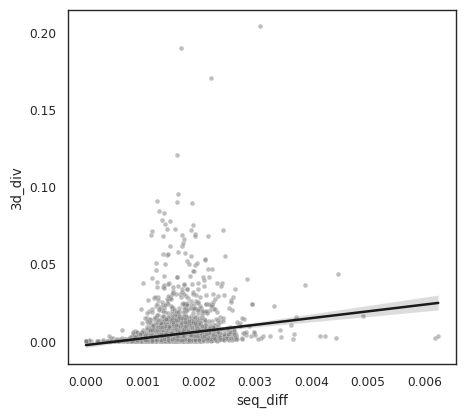

In [14]:
fig, ax = plt.subplots(figsize=(5,4.6))   
_ = sns.scatterplot(x='seq_diff', y='3d_div', data=all_indivs_avgs, s=12,alpha=0.5, color='grey')
_ = sns.regplot(data=all_indivs_avgs, y="3d_div", x="seq_diff", scatter=False, ax=ax,color='k')

In [72]:
all_melt = pd.concat([seq_melt, anc_melt.anc_div], axis=1)

In [73]:
all_melt

super  sub     sex       id  seq_diff   anc_div
chr   windowStartPos                                                
chr1  1048576          AFR  ACB  female  HG01880  0.002069  0.000982
      1572864          AFR  ACB  female  HG01880  0.001890  0.001445
      3145728          AFR  ACB  female  HG01880  0.002227  0.001283
      3670016          AFR  ACB  female  HG01880  0.002389  0.005119
      4194304          AFR  ACB  female  HG01880  0.002138  0.008681
...                    ...  ...     ...      ...       ...       ...
chr22 46661632         SAS  STU    male  HG04229  0.002056  0.002893
      47185920         SAS  STU    male  HG04229  0.002043  0.005283
      47710208         SAS  STU    male  HG04229  0.002489  0.045514
      48234496         SAS  STU    male  HG04229  0.003124  0.183812
      48758784         SAS  STU    male  HG04229  0.002911  0.005613

[11958342 rows x 6 columns]

In [74]:
# fig, ax = plt.subplots(figsize=(5,4.6))   
# _ = sns.scatterplot(x='seq_diff', y='anc_div', data=all_melt, s=12,alpha=0.5)
# _ = sns.regplot(data=all_melt, y="anc_div", x="seq_diff", scatter=False, ax=ax,color='k')

In [75]:
# fig, ax = plt.subplots(figsize=(4.6,1))  
# sns.kdeplot(all_melt[all_melt.anc_div<=0.05]['anc_div'], ax=ax)

In [76]:
# all_melt['anc_div'].plot.kde(color='navy',ax=ax)

In [77]:
xdata, ydata = all_melt["seq_diff"], all_melt["anc_div"]

<AxesSubplot: xlabel='seq_diff', ylabel='anc_div'>

/wynton/home/capra/egilbertson/.conda/envs/modern3d/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/wynton/home/capra/egilbertson/.conda/envs/modern3d/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


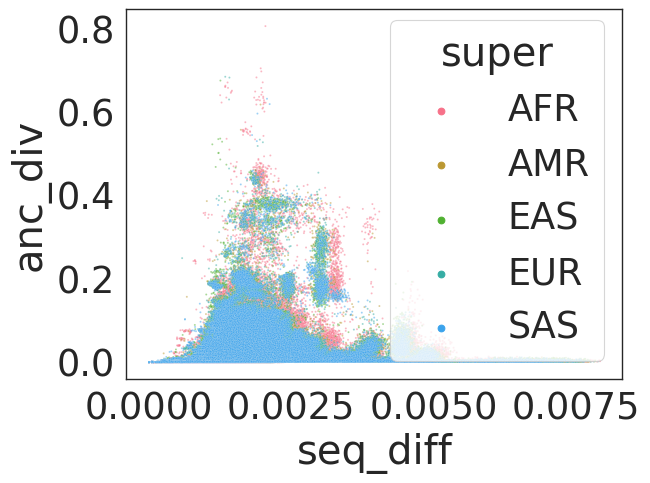

In [78]:
sns.scatterplot(x='seq_diff', y='anc_div', data=all_melt, s=2,alpha=0.5, hue = 'super')

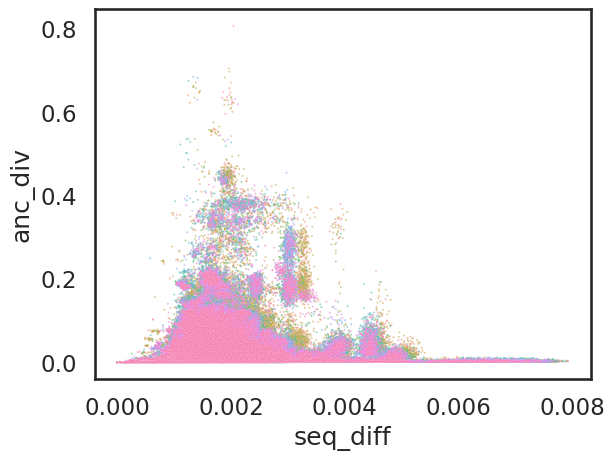

In [22]:
sns.scatterplot(x='seq_diff', y='anc_div', data=all_melt, s=2,alpha=0.5, hue = 'sub')
plt.legend('',frameon=False)

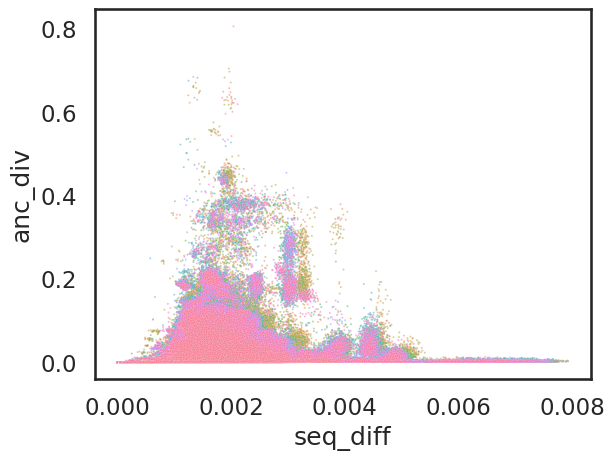

In [23]:
sns.scatterplot(x='seq_diff', y='anc_div', data=all_melt, s=2,alpha=0.5, hue = 'id')
plt.legend('',frameon=False)

In [24]:
all_melt.reset_index()

,chr,windowStartPos,super,sub,sex,id,seq_diff,anc_div
0,chr1,1048576,AFR,ACB,female,HG01880,0.002069,0.000982
1,chr1,1572864,AFR,ACB,female,HG01880,0.001890,0.001445
2,chr1,3145728,AFR,ACB,female,HG01880,0.002227,0.001283
3,chr1,3670016,AFR,ACB,female,HG01880,0.002389,0.005119
4,chr1,4194304,AFR,ACB,female,HG01880,0.002138,0.008681
...,...,...,...,...,...,...,...,...
11958337,chr22,46661632,SAS,STU,male,HG04229,0.002056,0.002893
11958338,chr22,47185920,SAS,STU,male,HG04229,0.002043,0.005283
11958339,chr22,47710208,SAS,STU,male,HG04229,0.002489,0.045514
11958340,chr22,48234496,SAS,STU,male,HG04229,0.003124,0.183812


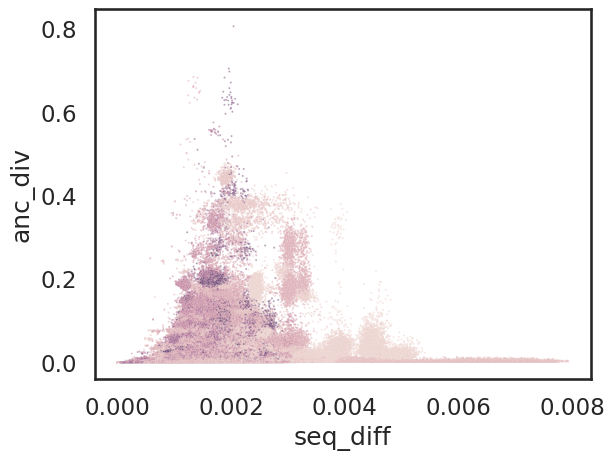

In [25]:
sns.scatterplot(x='seq_diff', y='anc_div', data=all_melt.reset_index(), s=2,alpha=0.5, hue = 'windowStartPos')
plt.legend('',frameon=False)

(0.015, 0.4)

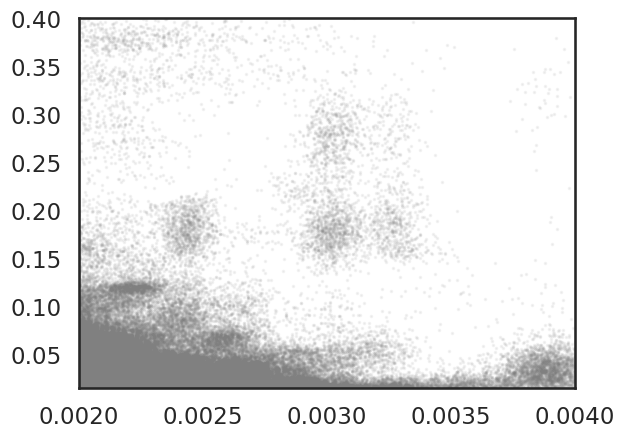

In [18]:
plt.scatter(xdata.values, ydata.values, color='grey', s=1, alpha = 0.1)
plt.xlim(0.002, 0.004)
plt.ylim(0.015, 0.4)

Text(0, 0.5, '3D Divergence')

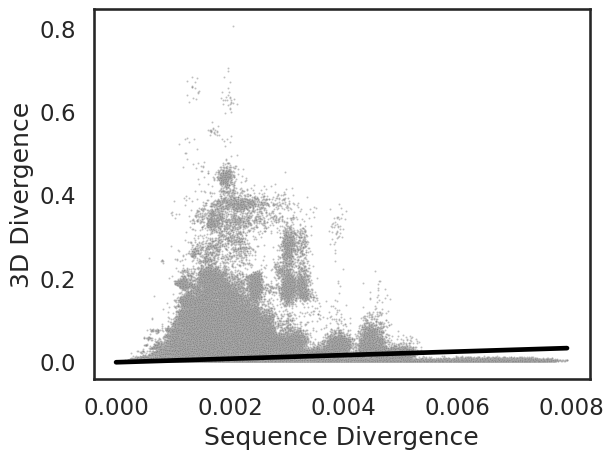

In [28]:
sns.scatterplot(x=xdata.values, y=ydata.values, color='grey', s=2, alpha = 0.5)
sns.regplot(x=xdata.values, y=ydata.values, scatter=False, color='black')
plt.xlabel('Sequence Divergence')
plt.ylabel('3D Divergence')

In [22]:
slope, intercept, r, p, se = stats.linregress(xdata.values, ydata.values)

In [23]:
stats.linregress(xdata.values, ydata.values)

LinregressResult(slope=4.291507484147253, intercept=-0.0022768724932120746, rvalue=0.13814922400785568, pvalue=0.0, stderr=0.008896959583381811, intercept_stderr=1.420949440792143e-05)

In [29]:
0.13814922400785568 **2

0.019085208093972687

In [24]:
stats.linregress(xdata.values, ydata.values)

LinregressResult(slope=4.291507484147253, intercept=-0.0022768724932120746, rvalue=0.13814922400785568, pvalue=0.0, stderr=0.008896959583381811, intercept_stderr=1.420949440792143e-05)

KeyboardInterrupt: 

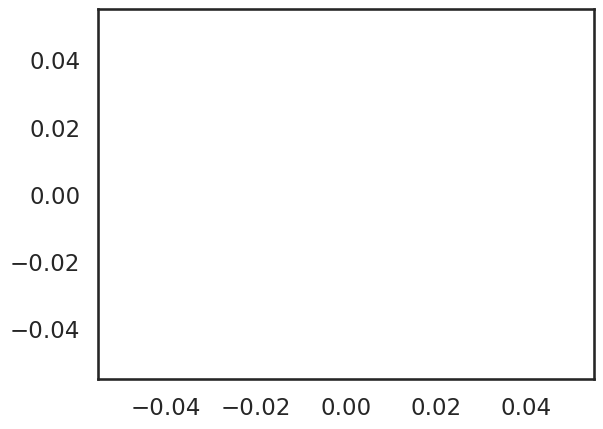

In [25]:
sns.regplot(x=xdata.values, y=ydata.values, scatter=False)

### Genome chunks dictionary to pickle

In [ ]:
chunks = dict.fromkeys(windows_to_keep.get_level_values(0).unique())

In [ ]:
for chrm in chunks.keys():
    chunks[chrm] = list(all_indivs_avgs.loc[chrm].index)

In [ ]:
chunks

{'chr1': [1048576,
  1572864,
  3145728,
  3670016,
  4194304,
  4718592,
  5242880,
  5767168,
  6291456,
  6815744,
  7340032,
  7864320,
  8388608,
  8912896,
  9437184,
  9961472,
  10485760,
  11010048,
  11534336,
  13107200,
  13631488,
  14155776,
  14680064,
  15204352,
  15728640,
  17301504,
  17825792,
  18350080,
  18874368,
  19398656,
  19922944,
  20447232,
  20971520,
  21495808,
  22020096,
  22544384,
  23068672,
  23592960,
  24117248,
  24641536,
  25165824,
  25690112,
  26214400,
  26738688,
  27262976,
  27787264,
  28311552,
  29884416,
  30408704,
  30932992,
  31457280,
  31981568,
  32505856,
  33030144,
  33554432,
  34078720,
  34603008,
  35127296,
  35651584,
  36175872,
  36700160,
  37224448,
  37748736,
  38273024,
  38797312,
  39321600,
  39845888,
  40370176,
  40894464,
  41418752,
  41943040,
  42467328,
  42991616,
  43515904,
  44040192,
  44564480,
  45088768,
  45613056,
  46137344,
  46661632,
  47185920,
  47710208,
  48234496,
  48758784,


In [ ]:
DATA_PATH+'/reference'

'/wynton/group/capra/projects/modern_human_3Dgenome/data/reference'

In [ ]:
import pickle

In [ ]:
pickle.dump( chunks, open( "%s/reference/genome_chunks_dict.p" % DATA_PATH, "wb" ) )

# Explore expected distributions

In [13]:
lst = list(range(1,101))
cols = ['chr','start_pos','num_diffs']+lst
chrms = [str(i) for i in list(range(1,23))]
inds = {'AFR':'AFR_ESN_female_HG03105', 'AMR':'AMR_CLM_female_HG01119', 'EUR':'EUR_CEU_female_NA06985', 'EAS':'EAS_CDX_female_HG00759', 'SAS':'SAS_BEB_female_HG03007'}
eDists = dict.fromkeys(inds.keys())

In [14]:
for pop in eDists.keys():
    print(pop)
    ind = inds[pop]
    pop_df = pd.DataFrame()
    for chrm in chrms:
        filename = "%s/%s/%s_chr%s_empiricDist_test.tsv"% (EXP_PATH, pop, ind, chrm)
        df = pd.read_table(filename, header=None, names=cols, index_col=[0,1])
        pop_df = pd.concat([pop_df, df])
    eDists[pop] = pop_df

AFR
AMR
EUR
EAS
SAS


In [15]:
num_diffs = pd.concat(
        [eDists['AFR']['num_diffs'], 
         eDists['AMR']['num_diffs'],
         eDists['EUR']['num_diffs'],
         eDists['EAS']['num_diffs'],
         eDists['SAS']['num_diffs']
         ],
        axis = 1, ignore_index=True)
num_diffs.columns = ['AFR','EUR','EAS','SAS','AMR']
eDists_all = pd.concat(
        [eDists['AFR'].drop(columns=['num_diffs']), 
         eDists['EUR'].drop(columns=['num_diffs']),
         eDists['EAS'].drop(columns=['num_diffs']),
         eDists['SAS'].drop(columns=['num_diffs']),
         eDists['AMR'].drop(columns=['num_diffs'])
         ], 
        axis=1, ignore_index=True).fillna(0)
eDists = pd.concat([num_diffs, eDists_all], axis = 1)

(0.0, 4000.0)

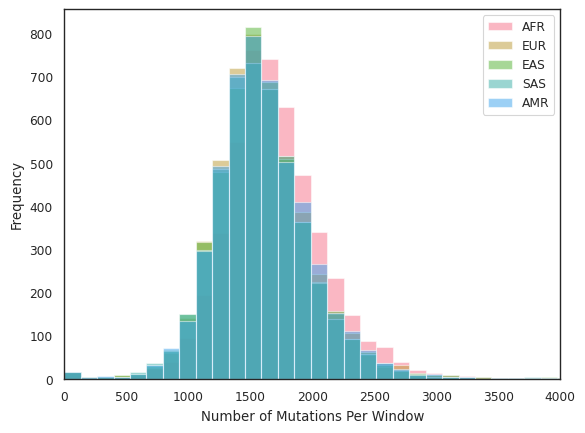

In [16]:
num_diffs.plot.hist(bins=50, alpha=0.5)
plt.xlabel('Number of Mutations Per Window')
plt.xlim(0,4000)


In [17]:
anc_div_summary = pd.DataFrame()
anc_div_summary['ALL'] = anc_div.mean(axis=1)
anc_div_summary['AFR'] = anc_div['AFR'].mean(axis=1)
anc_div_summary['EUR'] = anc_div['EUR'].mean(axis=1)
anc_div_summary['EAS'] = anc_div['EAS'].mean(axis=1)
anc_div_summary['SAS'] = anc_div['SAS'].mean(axis=1)
anc_div_summary['AMR'] = anc_div['AMR'].mean(axis=1)
anc_div_summary['min'] = anc_div.min(axis=1)
anc_div_summary['max'] = anc_div.max(axis=1)

anc_div_summary['emp_min'] = eDists_all.min(axis=1)
anc_div_summary['emp_max'] = eDists_all.max(axis=1)
eDists['mean'] = eDists_all.mean(axis=1)

## Plot mean obs vs mean expected

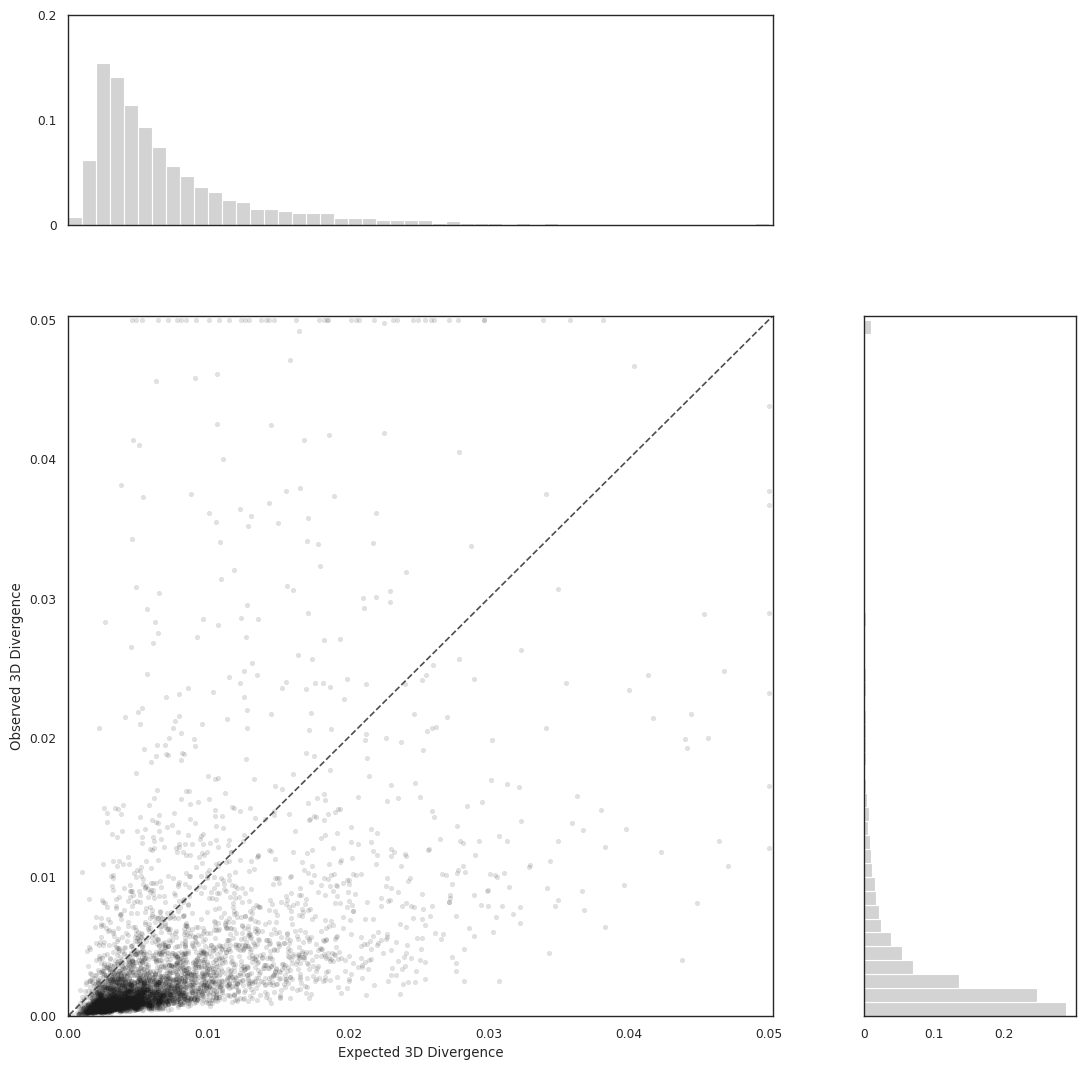

In [18]:
empiric = anc_div.mean(axis=1).reset_index(name='3D_divergence')
empiric['numMuts'] = num_diffs.mean(axis=1).values
empiric['meanExpected3Ddivergence'] = eDists['mean'].values

# Without color
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(13,13),gridspec_kw={'width_ratios': [5, 1.5], 'height_ratios': [1.5, 5]})         # Sample figsize in inches
empiric_clipped = empiric.copy(deep=True)
empiric_clipped['3D_divergence'] = empiric_clipped['3D_divergence'].clip(0,0.05)
empiric_clipped['meanExpected3Ddivergence'] = empiric_clipped['meanExpected3Ddivergence'].clip(0,0.05)

g = sns.scatterplot(y="3D_divergence", x="meanExpected3Ddivergence", s=12,alpha=0.13,data=empiric_clipped,ax=ax[1,0], color='k',linewidth=.15, edgecolor='k',)#, x_bins=np.arange(0.9965,1,0.00025))  #scatter_kws={'s':2}
_ = g.set(xlim=(0, 0.0503), ylim=(0, 0.0503), xlabel=("Expected 3D Divergence"), ylabel=("Observed 3D Divergence"))
_ = g.set()
_ = ax[1,0].plot([-3, 3], [-3, 3], ls="--", c=".3")


_ = ax[0,0].hist(empiric_clipped[['meanExpected3Ddivergence']].values.flatten(), bins=np.arange(0,0.0501,0.001),color='lightgray')
_ = ax[0,0].set(xlim=(0, 0.0503))
_ = ax[0,0].set( yticks=[0,.05*4873,.1*4873,.15*4873,.2*4873], yticklabels=[0,"",.1,"",0.2], xticklabels='')


_ = ax[1,1].hist(empiric_clipped[['3D_divergence']].values.flatten(),bins=np.arange(0,0.0501,0.001), orientation='horizontal', color='lightgray')
_ = ax[1,1].set(ylim=(0, 0.0503))
_ = ax[1,1].set(xticks=[0,.05*4873,.1*4873,.15*4873,.2*4873], xticklabels=[0,"",.1,"",0.2], yticklabels='')
ax[1,1].set()
ax[0, 1].axis('off')
plt.show()

In [19]:
print(sum(empiric['meanExpected3Ddivergence'] > empiric['3D_divergence']))
print(sum(empiric['meanExpected3Ddivergence'] > empiric['3D_divergence'])/len(empiric))
print()

print(sum(empiric['meanExpected3Ddivergence'] < empiric['3D_divergence']))
print(sum(empiric['meanExpected3Ddivergence'] < empiric['3D_divergence'])/len(empiric))
print()

print(empiric['meanExpected3Ddivergence'].mean()/empiric['3D_divergence'].mean())
print(stats.ttest_ind(empiric['meanExpected3Ddivergence'].values, empiric['3D_divergence'].values))

stats.binomtest(sum(empiric['meanExpected3Ddivergence'] > empiric['3D_divergence']), n=len(empiric), p=0.5)

4318
0.8861071208701006

555
0.11389287912989944

1.702435112440442
Ttest_indResult(statistic=18.417488014680195, pvalue=1.7327581864472686e-74)


BinomTestResult(k=4318, n=4873, alternative='two-sided', statistic=0.8861071208701006, pvalue=0.0)

## Windows where expected does not overlap observed

In [20]:
pop_higher = []
pop_lower = []
pop = 'AFR'
pop_min = anc_div[pop].min(axis=1)
pop_max = anc_div[pop].max(axis=1)
pop_higher += list(anc_div_summary[anc_div_summary['emp_max']<pop_min].index)
pop_lower += list(anc_div_summary[anc_div_summary['emp_min']>pop_max].index)

In [21]:
comp_list = pd.read_csv('%s/comp_tables/pairwise_subsample_genomewide_averages.csv' % RESULTS_PATH,
                       index_col=0)
sub_pops = list(set(comp_list.sub1).union(comp_list.sub2))

In [22]:
pops_higher_dict = dict.fromkeys(sub_pops)
pops_lower_dict = dict.fromkeys(sub_pops)
for pop in sub_pops:
    pop_min = anc_div.loc[ : , (slice(None) , pop)].min(axis=1)
    pop_max = anc_div.loc[ : , (slice(None) , pop)].max(axis=1)
    pops_higher_dict[pop] = list(anc_div_summary[anc_div_summary['emp_max']<pop_min].index)
    pops_lower_dict[pop] = list(anc_div_summary[anc_div_summary['emp_min']>pop_max].index)

In [23]:
for i in pops_higher_dict.keys():
    if len(pops_higher_dict[i]) > 0:
        print("%s higher than expected in %s windows" % (i, len(pops_higher_dict[i])))
    if len(pops_lower_dict[i]) > 0:
        print("%s lower than expected in %s windows" % (i, len(pops_lower_dict[i])))
    if (len(pops_higher_dict[i]) == 0) and (len(pops_lower_dict[i]) == 0):
        print("%s always overlaps expected distribution" % i)

STU always overlaps expected distribution
PUR always overlaps expected distribution
YRI always overlaps expected distribution
GBR always overlaps expected distribution
GWD always overlaps expected distribution
MXL always overlaps expected distribution
LWK always overlaps expected distribution
BEB always overlaps expected distribution
ACB always overlaps expected distribution
GIH always overlaps expected distribution
ASW always overlaps expected distribution
CLM always overlaps expected distribution
JPT always overlaps expected distribution
MSL always overlaps expected distribution
PEL always overlaps expected distribution
CDX always overlaps expected distribution
FIN always overlaps expected distribution
CHS always overlaps expected distribution
ESN always overlaps expected distribution
CHB always overlaps expected distribution
ITU always overlaps expected distribution
KHV always overlaps expected distribution
IBS always overlaps expected distribution
PJL always overlaps expected distr

## Windows where distribution of modern divergence is significantly different from empircal expectation

### set up

In [24]:
def do_stats(row):
    i = row.name
    obs = anc_div.loc[i]
    exp = eDists_all.loc[i]
    t,p = stats.ttest_ind(exp,obs)
    
    obs_mean = obs.mean()
    exp_mean = exp.mean()
    ratio = obs_mean/exp_mean
    delta = obs_mean - exp_mean
    neglogp = -np.log10(p)
    if delta > 0:
        direction = 'higher'
    if delta < 0:
        direction = 'lower'

    sig = p<0.05/len(windows_to_keep)
    return pd.Series([t, p, exp_mean, obs_mean, ratio, delta, neglogp, direction, sig])


# find number of individuals that have lower observed divergence than expected for each window
def count_outside(row):
    i = row.name
    above = len(anc_div.loc[i][anc_div.loc[i] > anc_div_summary['emp_max'].loc[i]])
    below = len(anc_div.loc[i][anc_div.loc[i] < anc_div_summary['emp_min'].loc[i]])
    return above, below

In [25]:
distStats = pd.DataFrame(index = anc_div.index, columns = ['ttest_stat','ttest_pval','obs_mean','exp_mean','obs/exp','obs-exp', '-log10(p)', 'direction', 'sig'])
alpha = 0.05/len(windows_to_keep)
distStats[['ttest_stat','ttest_pval','exp_mean','obs_mean','obs/exp', 'obs-exp' , '-log10(p)', 'direction', 'sig']] = distStats.apply(do_stats, axis=1)
distStats[['numWindowsAbove','numWindowsBelow']] = distStats.apply(count_outside, axis=1, result_type='expand')


distStats_sig = distStats[distStats['ttest_pval']<=alpha]
distStats_more = distStats_sig[distStats_sig['obs/exp']>1]
distStats_less = distStats_sig[distStats_sig['obs/exp']<1]


/scratch/egilbertson/ipykernel_7195/1212352188.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = obs_mean/exp_mean
/scratch/egilbertson/ipykernel_7195/1212352188.py:11: RuntimeWarning: divide by zero encountered in log10
  neglogp = -np.log10(p)


Number of windows significantly different from expected

In [26]:
print(distStats_less.shape[0] + distStats_more.shape[0])
print(distStats_sig.shape[0])

4432
4432


Number of windows not significantly different than expected

In [27]:
len(windows_to_keep) - (distStats_sig.shape[0])

441

In [28]:
# drop windows where observed == 0, n=8
distStats = distStats[distStats['obs_mean']!=0]
distStats_sig = distStats[distStats['ttest_pval']<=alpha]
distStats_more = distStats_sig[distStats_sig['obs/exp']>1]
distStats_less = distStats_sig[distStats_sig['obs/exp']<1]

### counting number of +/- diverged than expected individuals per window

In [29]:
distStats

ttest_stat     ttest_pval  obs_mean  exp_mean   obs/exp  \
chr   windowStartPos                                                            
chr1  1048576          20.535906   1.045954e-87  0.001068  0.003634  0.293991   
      1572864          28.000778  3.288944e-153  0.001490  0.006541  0.227866   
      3145728           7.259478   4.945922e-13  0.003121  0.004522  0.690173   
      3670016           9.733537   4.638277e-22  0.004617  0.007087  0.651480   
      4194304          10.998926   1.318518e-27  0.008626  0.015544  0.554951   
...                          ...            ...       ...       ...       ...   
chr22 46661632         22.979621  1.215207e-107  0.003650  0.013944  0.261784   
      47185920         21.726243   3.240259e-97  0.007319  0.031791  0.230209   
      47710208        -26.485256  7.297025e-139  0.055388  0.020211  2.740559   
      48234496        -55.442420   0.000000e+00  0.204145  0.035823  5.698711   
      48758784         25.344617  2.168919e-128  0.005756  0.028964  0.198738   

                       obs-exp   -log10(p) direction   sig  numWindowsAbove  \
chr   windowStartPos                                                          
chr1  1048576        -0.002565   86.980488     lower  True                0   
      1572864        -0.005050  152.482944     lower  True                0   
      3145728        -0.001401   12.305753     lower  True                0   
      3670016        -0.002470   21.333643     lower  True                1   
      4194304        -0.006918   26.879914     lower  True                1   
...                        ...         ...       ...   ...              ...   
chr22 46661632       -0.010294  106.915350     lower  True                0   
      47185920       -0.024472   96.489420     lower  True                0   
      47710208        0.035178  138.136854    higher  True                0   
      48234496        0.168322         inf    higher  True              367   
      48758784       -0.023208  127.663757     lower  True                0   

                      numWindowsBelow  
chr   windowStartPos                   
chr1  1048576                      59  
      1572864                      40  
      3145728                      12  
      3670016                       0  
      4194304                       0  
...                               ...  
chr22 46661632                     70  
      47185920                      3  
      47710208                      0  
      48234496                      0  
      48758784                      9  

[4873 rows x 11 columns]

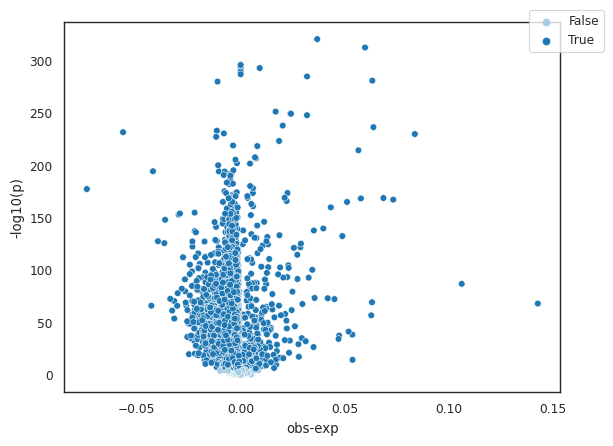

In [30]:
sns.scatterplot(x = 'obs-exp', y = '-log10(p)', data = distStats, hue='sig', palette='Paired')
plt.legend(bbox_to_anchor=(1.1, 1.05))

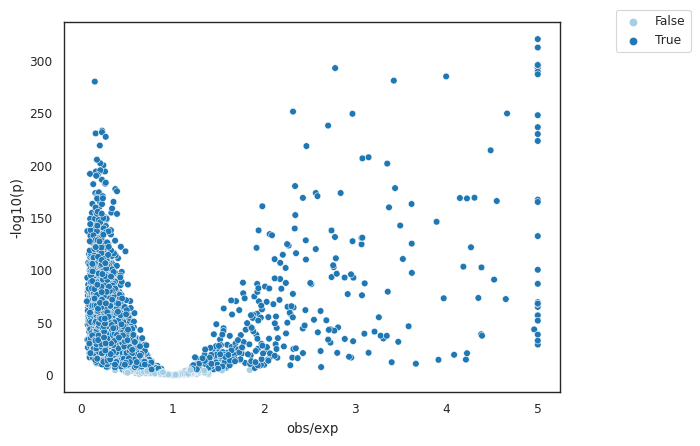

In [31]:
distStats_clipped_ratio = distStats.copy(deep=True)
distStats_clipped_ratio['obs/exp'] = distStats_clipped_ratio['obs/exp'].clip(0,5)
sns.scatterplot(x = 'obs/exp', y = '-log10(p)', data = distStats_clipped_ratio, hue='sig', palette='Paired')
plt.legend(bbox_to_anchor=(1.1, 1.05))

Text(0.5, 1.0, 'Distribution of number of individuals outside \n of expected distribution in windows that are \nsignificantly more diverged than expected')

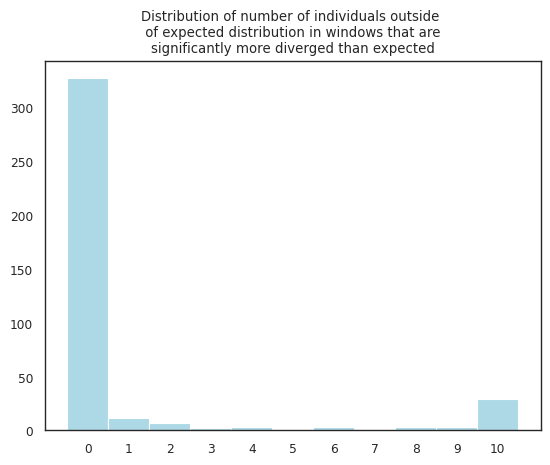

In [32]:
distStats_clipped_numWindowsAbove = distStats_more.copy(deep=True)
distStats_clipped_numWindowsAbove['numWindowsAbove'] = distStats_clipped_numWindowsAbove['numWindowsAbove'].clip(0,10)
plt.hist(distStats_clipped_numWindowsAbove['numWindowsAbove'], align='left', rwidth=1, bins=[0,1,2,3,4,5,6,7,8,9,10,11], color = 'lightblue')
plt.xticks(range(11))
plt.title("Distribution of number of individuals outside \n of expected distribution in windows that are \nsignificantly more diverged than expected")


Text(0.5, 1.0, 'Distribution of number of individuals outside \n of expected distribution in windows that are \nsignificantly less diverged than expected')

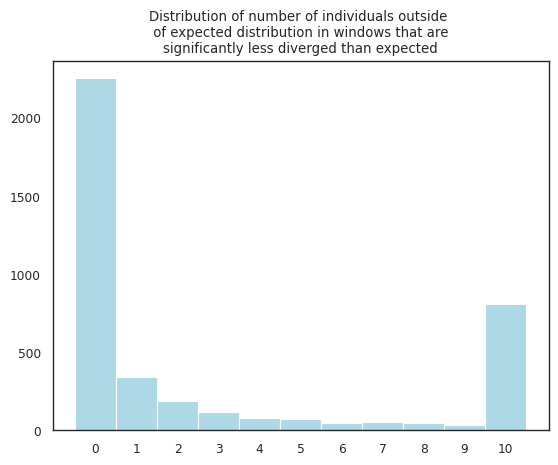

In [33]:
distStats_clipped_numWindowsBelow = distStats_less.copy(deep=True)
distStats_clipped_numWindowsBelow['numWindowsBelow'] = distStats_clipped_numWindowsBelow['numWindowsBelow'].clip(0,10)
plt.hist(distStats_clipped_numWindowsBelow['numWindowsBelow'], align='left', rwidth=1, bins=[0,1,2,3,4,5,6,7,8,9,10,11], color = 'lightblue')
plt.xticks(range(11))
plt.title("Distribution of number of individuals outside \n of expected distribution in windows that are \nsignificantly less diverged than expected")

In [34]:
distStats_clipped_numWindowsAbove['numWindowsAbove']

chr    windowStartPos
chr1   41418752           2
       57147392           1
       70778880           0
       88604672           7
       92798976           0
                         ..
chr21  35127296           0
chr22  22020096           0
       22544384           0
       47710208           0
       48234496          10
Name: numWindowsAbove, Length: 391, dtype: int64

In [35]:
def plot_dists(idxs):
    for i in idxs:
        print(i)
        plt.figure(figsize=(12,6))
        mini = anc_div_summary.loc[i].min()
        maxi = anc_div_summary.loc[i].max()
        width = (maxi-mini)/100
        ax = sns.histplot(eDists_all.loc[i], alpha=.2, color='k', binwidth=width, element='step')

        emp_max = anc_div_summary.loc[i]['emp_max']
        emp_min = anc_div_summary.loc[i]['emp_min']
        emp_mean = eDists.loc[i]['mean']
        obs_mean = anc_div.loc[i].mean()
        plt.axvline(x = emp_max,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1, # Top of the plot
           lw = 2, color = 'k') 
        plt.axvline(x = emp_min,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1, # Top of the plot
           lw = 2, color = 'k') 
        plt.axvline(x = emp_mean,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1, # Top of the plot
           ls = ':', lw = 2, color = 'grey') 
        plt.axvline(x = obs_mean,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1, # Top of the plot
           ls = ':', lw = 2, color = 'steelblue') 

        sns.histplot(anc_div['AFR'].loc[i], alpha=.5, linewidth=0, binwidth=width)
        sns.histplot(anc_div['EUR'].loc[i], alpha=.5, linewidth=0, binwidth=width)
        sns.histplot(anc_div['EAS'].loc[i], alpha=.5, linewidth=0, binwidth=width)
        sns.histplot(anc_div['SAS'].loc[i], alpha=.5, linewidth=0, binwidth=width)
        sns.histplot(anc_div['AMR'].loc[i], alpha=.5, linewidth=0, binwidth=width)
        plt.xlabel('3D Divergence')
        plt.suptitle('Population observed divergence (colors) with expected divergence (grey)')
        plt.title(i)
        plt.show()
    return

('chr10', 95944704)


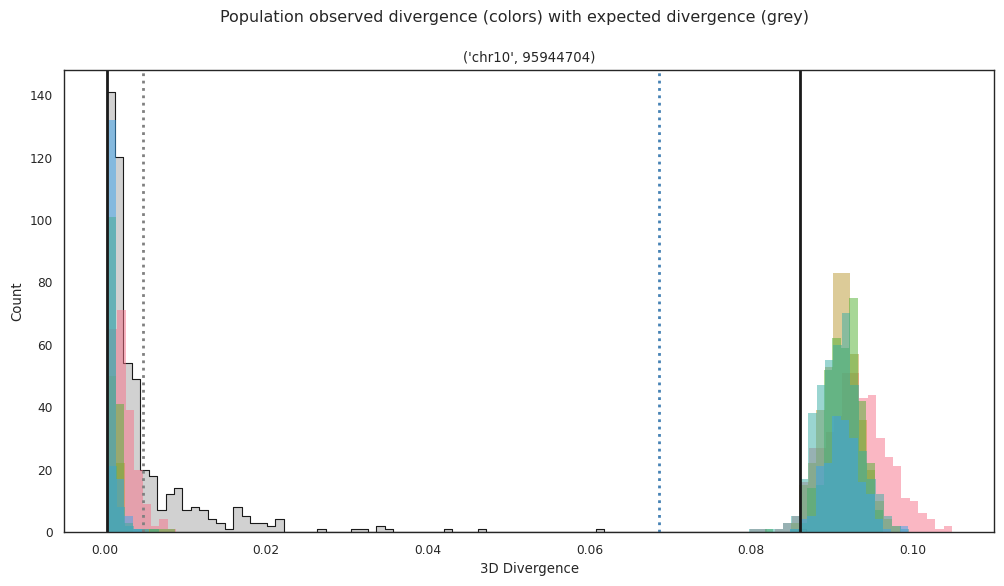

('chr8', 88080384)


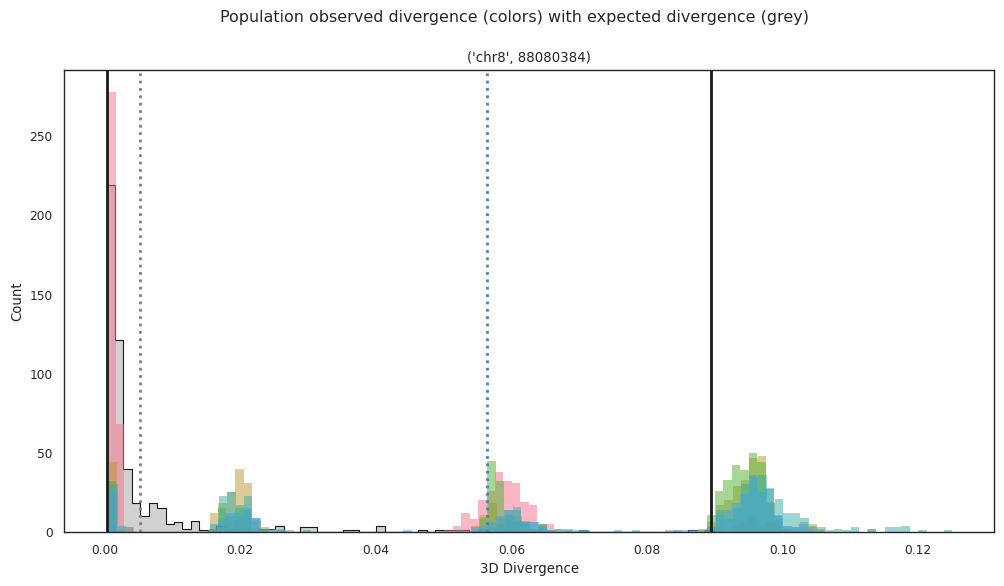

('chr1', 152567808)


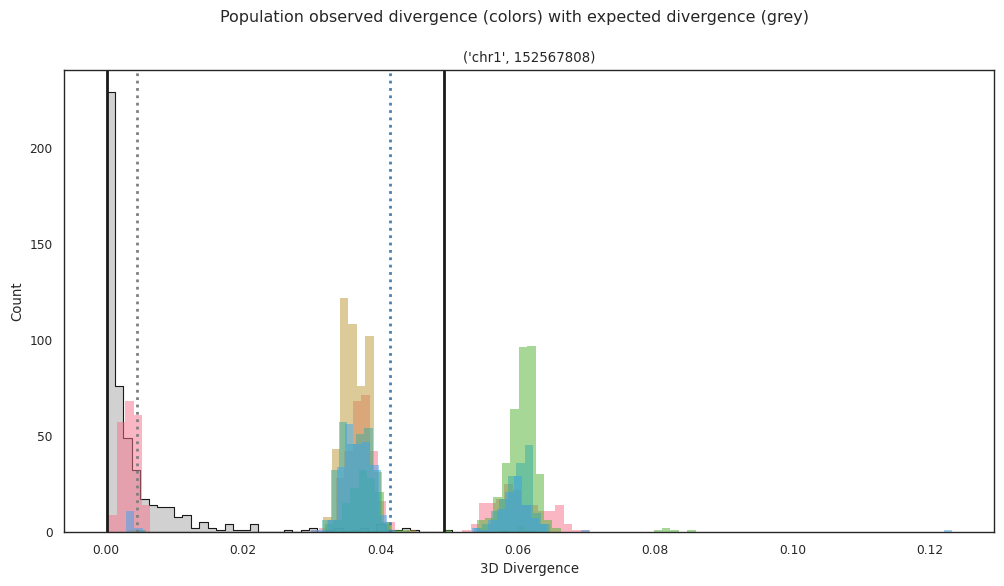

In [36]:
idxs = [('chr10', 95944704), ('chr8', 88080384),  ('chr1', 152567808)]
plot_dists(idxs)

('chr2', 94896128)


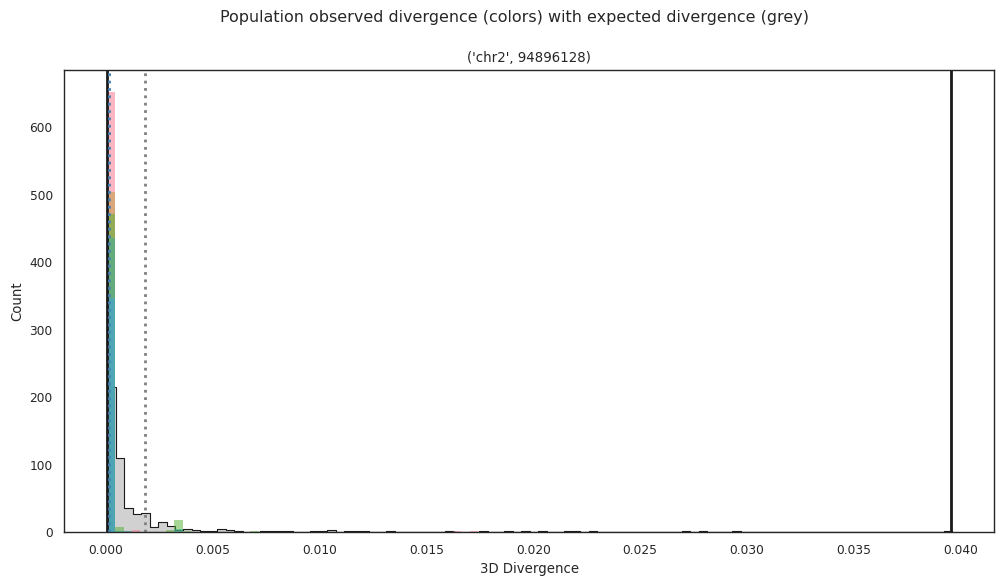

('chr8', 37224448)


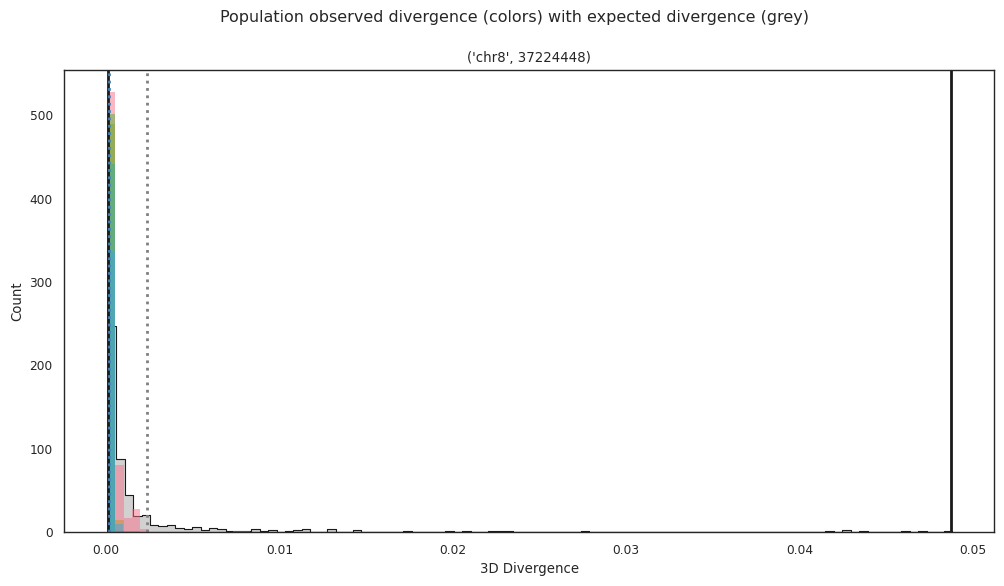

('chr15', 31981568)


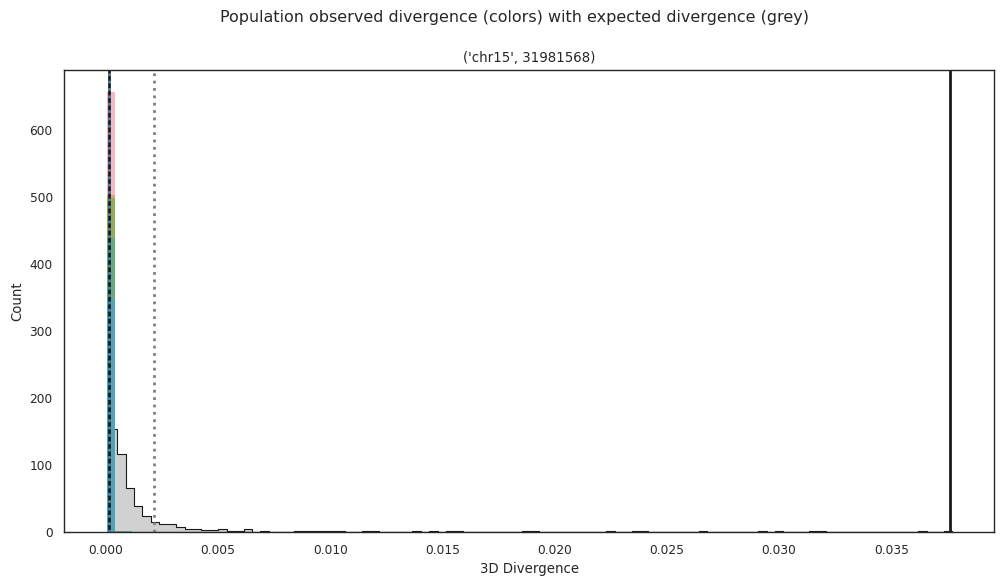

('chr3', 31457280)


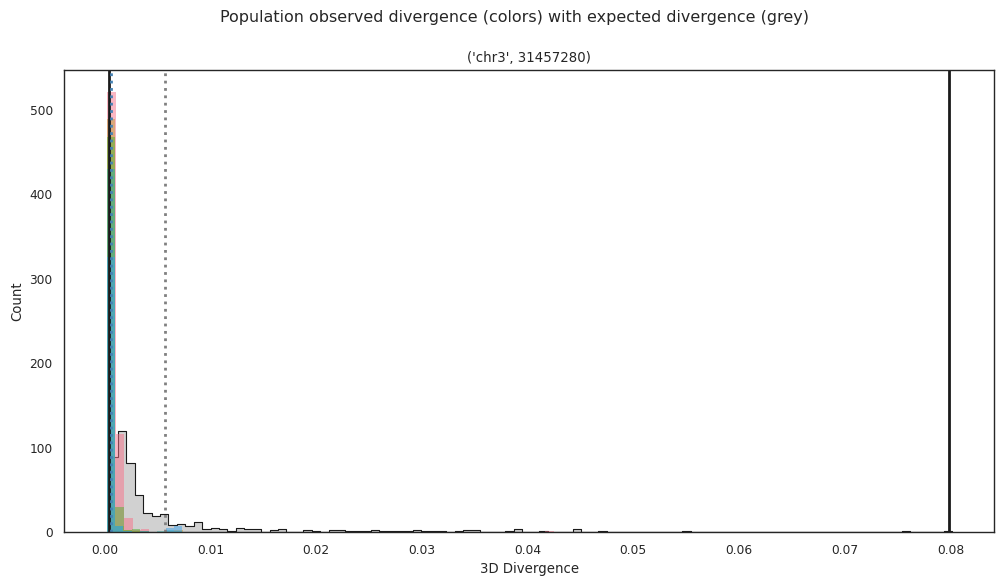

('chr15', 74973184)


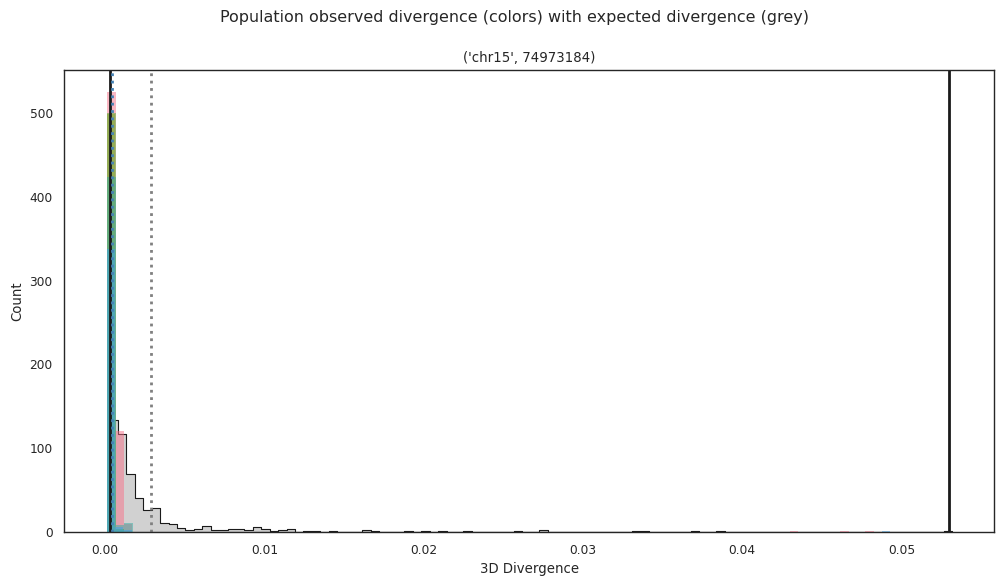

('chr7', 41943040)


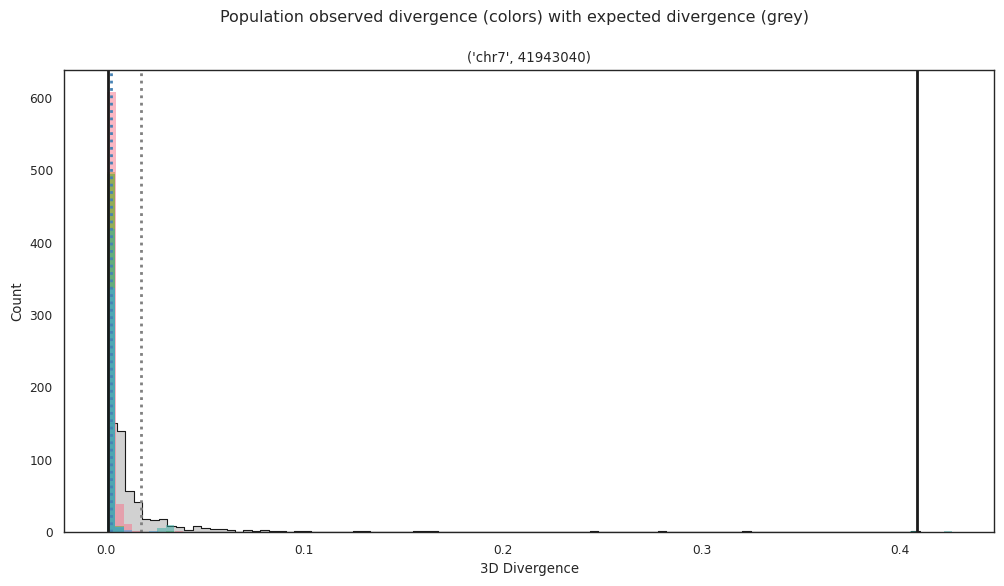

('chr13', 47710208)


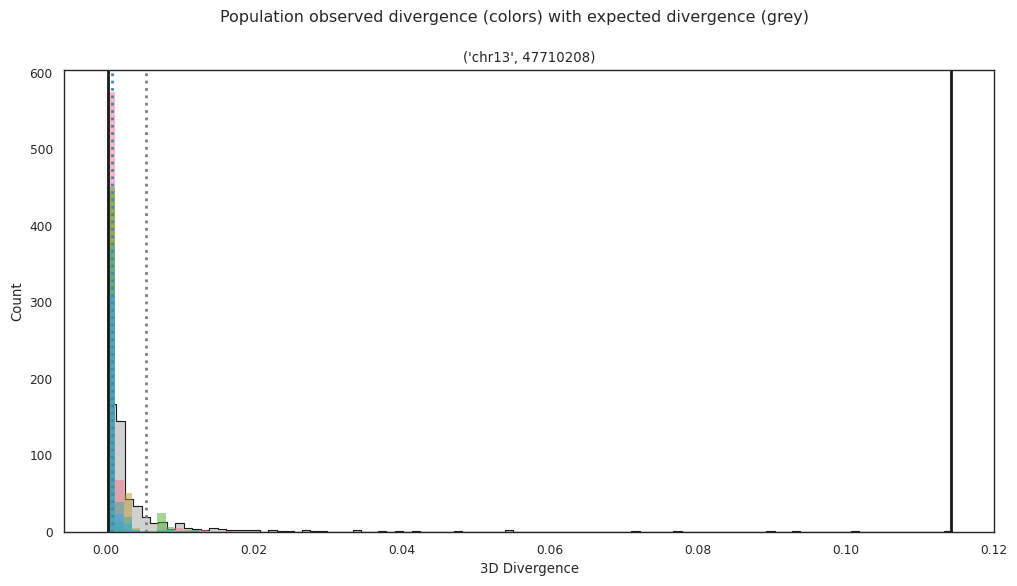

('chr15', 66584576)


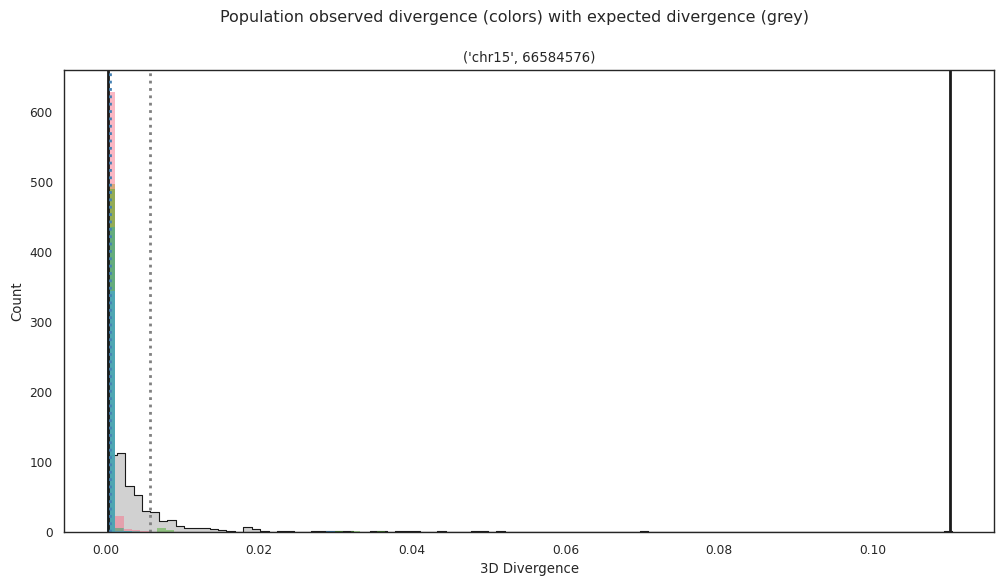

('chr20', 34078720)


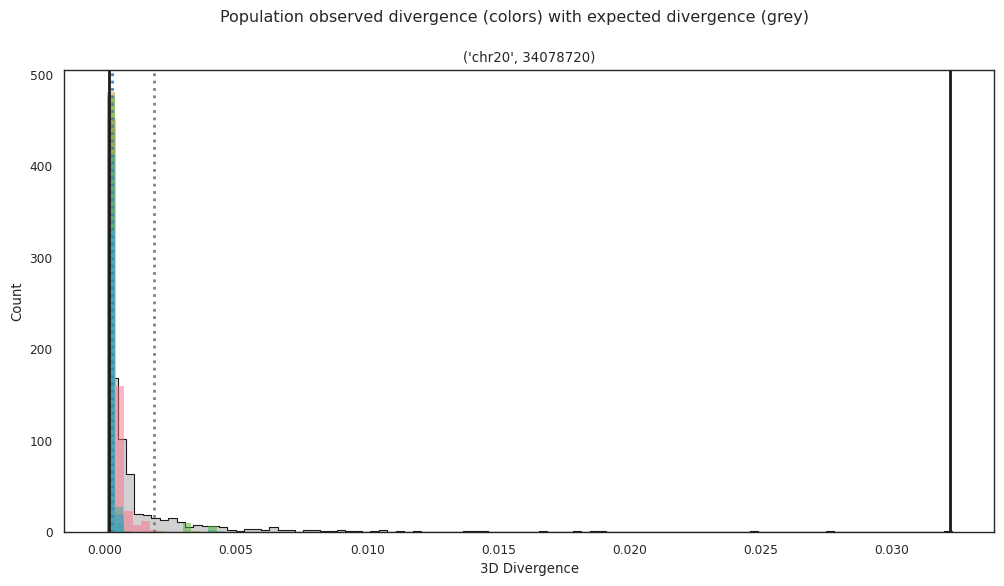

('chr7', 56098816)


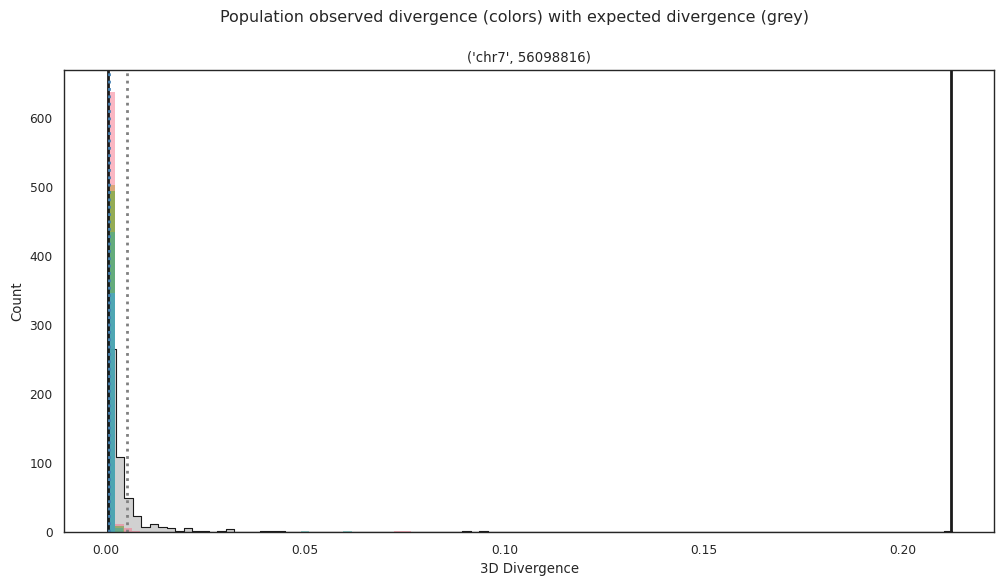

In [37]:
idxs = distStats_less[distStats_less['obs_mean']!=0][distStats_less['ttest_pval']<=alpha].sort_values(by='numWindowsBelow', ascending=False).head(n=10).index
plot_dists(idxs)

In [38]:
anc_div.loc[('chr10', 95944704)].idxmax()

('AFR', 'MSL', 'female', 'HG03575')

In [39]:
anc_div.loc[('chr10', 95944704)].idxmin()

('EAS', 'CHS', 'female', 'HG00407')

In [40]:
a = pd.DataFrame(anc_div.loc[('chr8', 88080384)])

In [41]:
a.columns = ['chrm']

In [42]:
a[a.chrm >.08].index

MultiIndex([('AFR', 'ACB', 'female', 'HG01880'),
            ('AFR', 'ACB', 'female', 'HG01886'),
            ('AFR', 'ACB', 'female', 'HG01915'),
            ('AFR', 'ACB', 'female', 'HG02427'),
            ('AFR', 'ACB', 'female', 'HG02497'),
            ('AFR', 'ACB', 'female', 'HG02502'),
            ('AFR', 'ACB', 'female', 'HG02546'),
            ('AFR', 'ACB',   'male', 'HG01879'),
            ('AFR', 'ACB',   'male', 'HG01986'),
            ('AFR', 'ACB',   'male', 'HG02307'),
            ...
            ('SAS', 'STU',   'male', 'HG03856'),
            ('SAS', 'STU',   'male', 'HG03885'),
            ('SAS', 'STU',   'male', 'HG03887'),
            ('SAS', 'STU',   'male', 'HG03953'),
            ('SAS', 'STU',   'male', 'HG03985'),
            ('SAS', 'STU',   'male', 'HG03991'),
            ('SAS', 'STU',   'male', 'HG04006'),
            ('SAS', 'STU',   'male', 'HG04033'),
            ('SAS', 'STU',   'male', 'HG04039'),
            ('SAS', 'STU',   'male', 'HG04210')],
   

<AxesSubplot: xlabel='obs_mean', ylabel='obs/exp'>

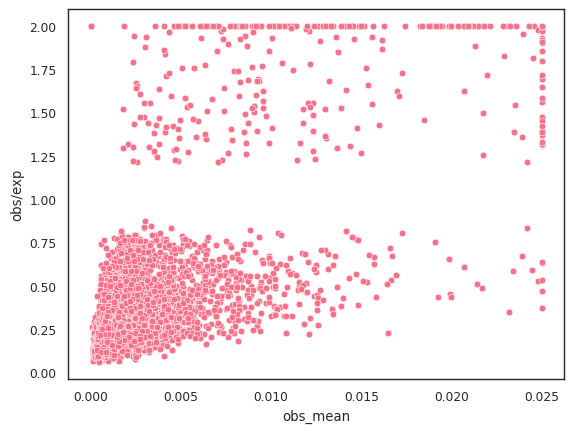

In [43]:
clipped = distStats[distStats['ttest_pval']<=alpha].copy(deep=True)
clipped['obs_mean'] = clipped['obs_mean'].clip(0,.025)
clipped['obs/exp'] = clipped['obs/exp'].clip(0,2)
sns.scatterplot(data = clipped, x = 'obs_mean', y = 'obs/exp')

## How correlated is obs-exp with mean divergences

In [44]:
distStats

ttest_stat     ttest_pval  obs_mean  exp_mean   obs/exp  \
chr   windowStartPos                                                            
chr1  1048576          20.535906   1.045954e-87  0.001068  0.003634  0.293991   
      1572864          28.000778  3.288944e-153  0.001490  0.006541  0.227866   
      3145728           7.259478   4.945922e-13  0.003121  0.004522  0.690173   
      3670016           9.733537   4.638277e-22  0.004617  0.007087  0.651480   
      4194304          10.998926   1.318518e-27  0.008626  0.015544  0.554951   
...                          ...            ...       ...       ...       ...   
chr22 46661632         22.979621  1.215207e-107  0.003650  0.013944  0.261784   
      47185920         21.726243   3.240259e-97  0.007319  0.031791  0.230209   
      47710208        -26.485256  7.297025e-139  0.055388  0.020211  2.740559   
      48234496        -55.442420   0.000000e+00  0.204145  0.035823  5.698711   
      48758784         25.344617  2.168919e-128  0.005756  0.028964  0.198738   

                       obs-exp   -log10(p) direction   sig  numWindowsAbove  \
chr   windowStartPos                                                          
chr1  1048576        -0.002565   86.980488     lower  True                0   
      1572864        -0.005050  152.482944     lower  True                0   
      3145728        -0.001401   12.305753     lower  True                0   
      3670016        -0.002470   21.333643     lower  True                1   
      4194304        -0.006918   26.879914     lower  True                1   
...                        ...         ...       ...   ...              ...   
chr22 46661632       -0.010294  106.915350     lower  True                0   
      47185920       -0.024472   96.489420     lower  True                0   
      47710208        0.035178  138.136854    higher  True                0   
      48234496        0.168322         inf    higher  True              367   
      48758784       -0.023208  127.663757     lower  True                0   

                      numWindowsBelow  
chr   windowStartPos                   
chr1  1048576                      59  
      1572864                      40  
      3145728                      12  
      3670016                       0  
      4194304                       0  
...                               ...  
chr22 46661632                     70  
      47185920                      3  
      47710208                      0  
      48234496                      0  
      48758784                      9  

[4873 rows x 11 columns]

Text(0, 0.5, 'mean divergence')

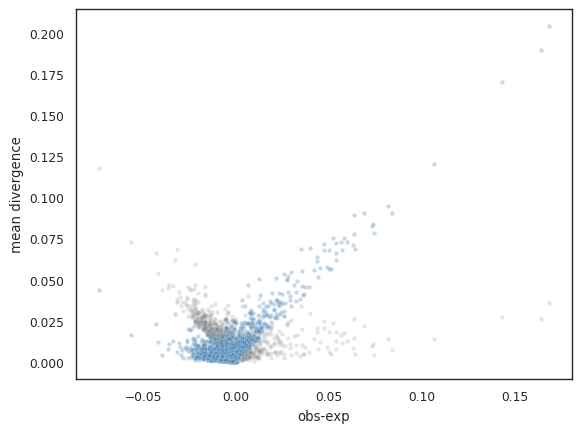

In [45]:
sns.scatterplot(x='obs-exp', y = 'exp_mean', data = distStats, color = 'grey', alpha=.2, s= 10)
sns.scatterplot(x='obs-exp', y = 'obs_mean', data = distStats, color='steelblue', alpha=.3, s=10)
plt.ylabel('mean divergence')

<AxesSubplot: xlabel='obs-exp', ylabel='exp_mean'>

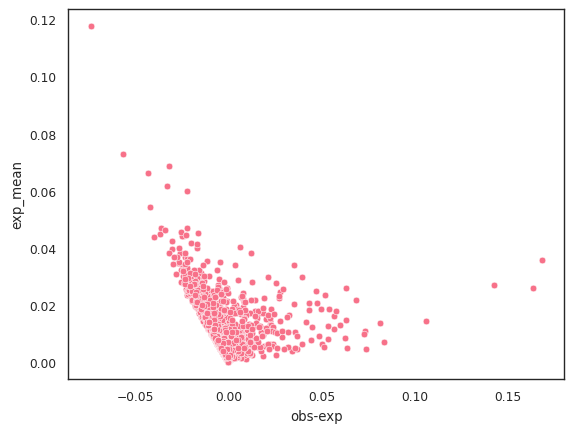

In [46]:
sns.scatterplot(x='obs-exp', y = 'exp_mean', data = distStats)

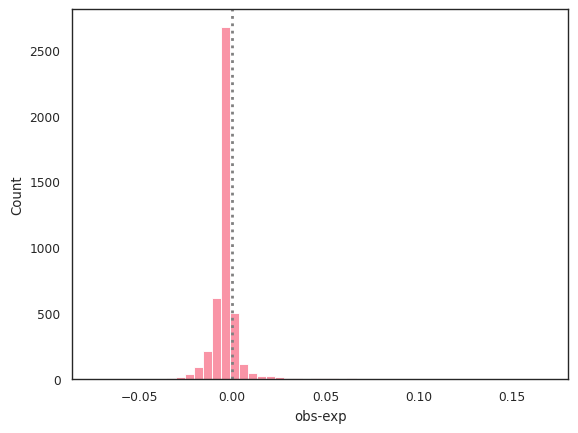

In [47]:
sns.histplot(distStats_sig['obs-exp'],bins=50 )
plt.axvline(x = 0,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1, # Top of the plot
           ls = ':', lw = 2, color = 'grey') 

## Annotate deciles

In [50]:
def PercentileToQuantile(x, bins):
    numQuants = bins
    quantSize = 1/numQuants
    currentQuant = quantSize
    currentReturn = 1
    numDecs = int(str(quantSize)[::-1].find('.'))
    for i in range(numQuants):
        if x < currentQuant:
            return currentReturn
        elif x == 1:
            return numQuants
        else:
            currentQuant = round((currentQuant + quantSize), numDecs)
            currentReturn += 1


def QuantAnnotate(distStat_df, annot_data, annot_type, quant_bins, metric):
    regions = distStat_df.copy(deep=True)
    regions['divergence_percentile'] = regions[metric].rank(pct=True)
    regions = regions.reset_index()
    regions['divergence_percentile_group'] = regions['divergence_percentile'].apply(PercentileToQuantile, bins=quant_bins)
    regions['stop'] = regions['windowStartPos'] + 2**20
    regions = regions[['chr','windowStartPos','stop',metric,'divergence_percentile','divergence_percentile_group']]
    regions.columns = ['chr','start','stop'] + list(regions.columns)[3:]
    region_list = regions[['chr','start','stop', 'divergence_percentile_group',metric]]

    if annot_type == 'genes':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','gene_name','numBases']
        annotation['annot_count'] = 1
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group', metric], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','annot_count':'sum', 'divergence_percentile_group':'mean', metric:'mean'})
        annotation_grouped['propBasesCovered'] = annotation_grouped['numBases']/(2**20)
        annotation_grouped= annotation_grouped.reset_index()

    if annot_type=='ctcf':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','numBases']
        annotation['annot_count'] = 1
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group', metric], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','annot_count':'sum', 'divergence_percentile_group':'mean', metric:'mean'})
        annotation_grouped['propBasesCovered'] = annotation_grouped['numBases']/(2**20)
        annotation_grouped= annotation_grouped.reset_index()

    if annot_type=='phastCons':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','lod','phastCons_score','numBases']
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group', metric], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','phastCons_score':'mean', 'divergence_percentile_group':'mean', metric:'mean'})
        annotation_grouped= annotation_grouped.reset_index()

    if annot_type=='rmsk':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','repeat_type','repeat_score','strand','numBases']
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group', metric], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','repeat_score':'mean', 'divergence_percentile_group':'mean', metric:'mean'})
        annotation_grouped= annotation_grouped.reset_index()
    return annotation_grouped, regions

In [51]:
# read in annotations
phastCons = pybedtools.BedTool('%s/annotations/phastConsElements100way_hg38.bed' % DATA_PATH)
ctcf = pybedtools.BedTool('%s/annotations/ctcf_all_hg38.bed' % DATA_PATH).merge()
rmsk = pybedtools.BedTool('%s/annotations/rmsk_hg38.bed' % DATA_PATH)
genes = pybedtools.BedTool('%s/annotations/grch38_gene_annotations.bed' % DATA_PATH)

r2 =  0.010040043534481865 p = 0.047707009336487465


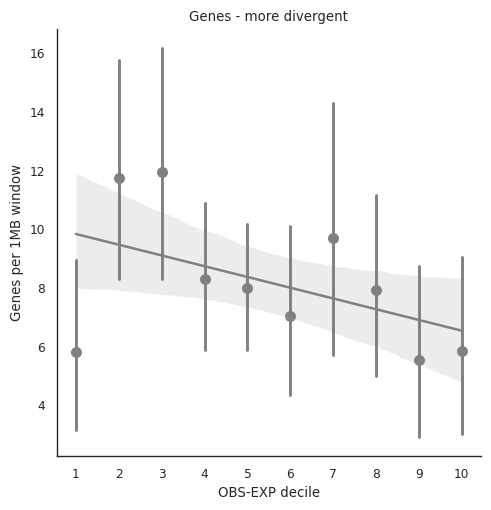

r2 =  0.010040043534481865 p = 0.047707009336487465


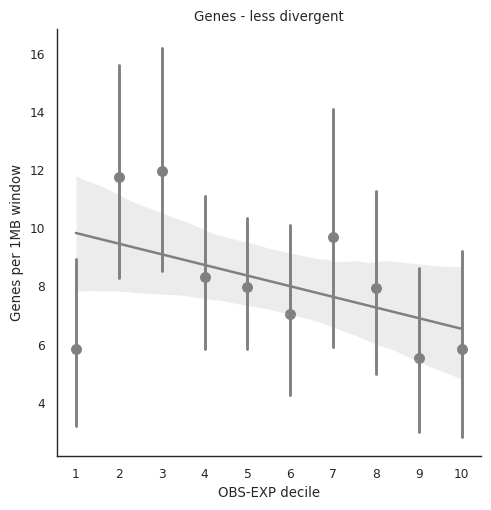

r2 =  0.04371678192990975 p = 5.694367773454832e-45


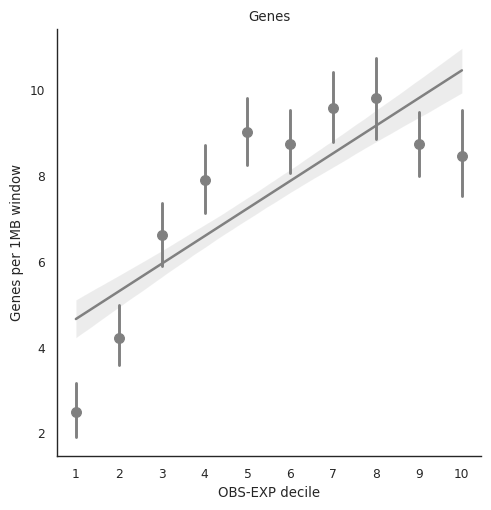

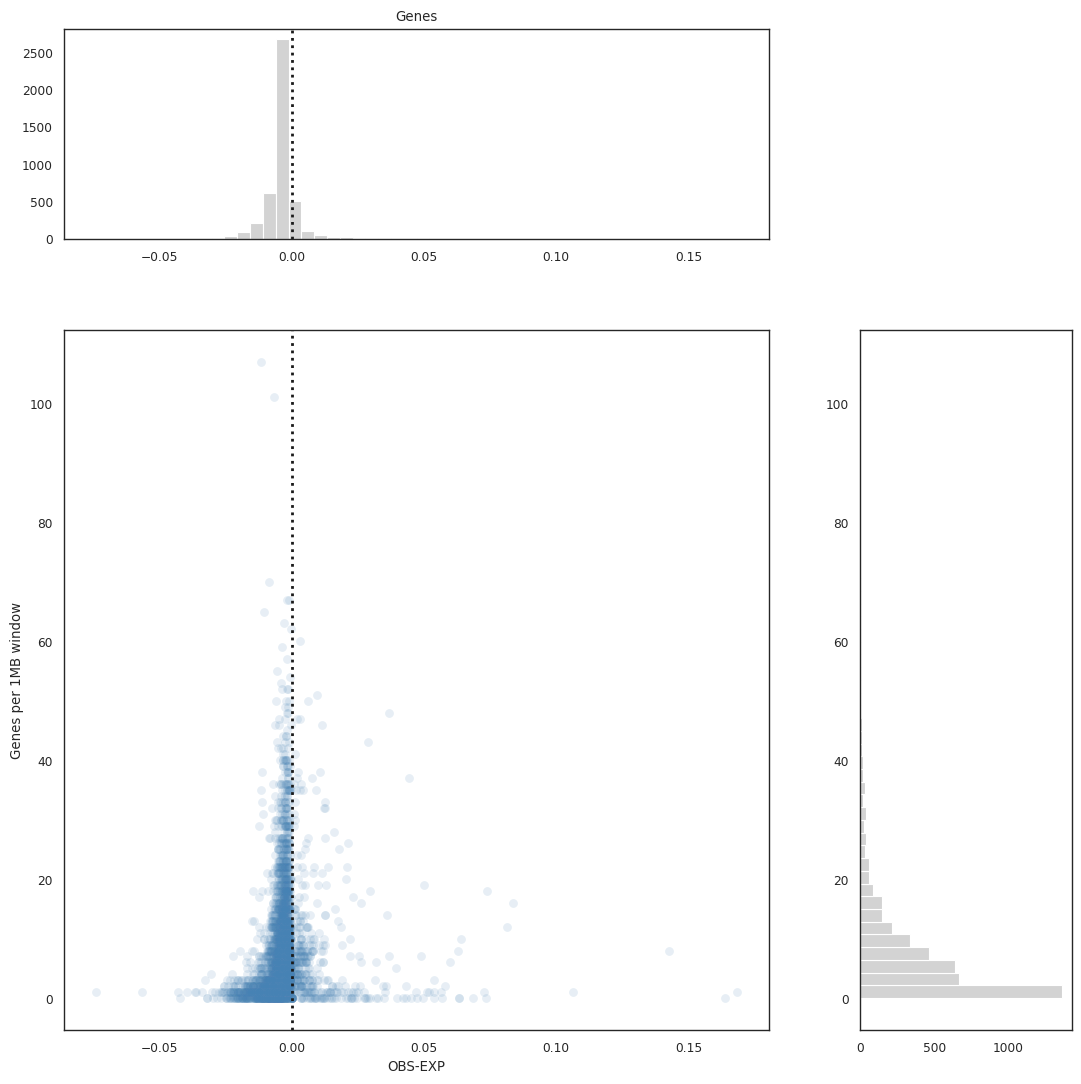

In [53]:
#more divergent than expected
annotation, regions = QuantAnnotate(distStats_more, annot_data = genes, annot_type = 'genes', quant_bins=10, metric = 'obs-exp')
g = sns.lmplot(x='divergence_percentile_group', y='annot_count', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="OBS-EXP decile", ylabel="Genes per 1MB window", title='Genes - more divergent')
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['annot_count'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))
plt.show()

#less divergent than expected
g = sns.lmplot(x='divergence_percentile_group', y='annot_count', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="OBS-EXP decile", ylabel="Genes per 1MB window", title='Genes - less divergent')
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['annot_count'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))
plt.show()


# all significantly different than expected
annotation, regions = QuantAnnotate(distStats_sig, annot_data = genes, annot_type = 'genes', quant_bins=10, metric = 'obs-exp')
g = sns.lmplot(x='divergence_percentile_group', y='annot_count', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="OBS-EXP decile", ylabel="Genes per 1MB window", title='Genes')
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['annot_count'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))

# raw plot
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(13,13),gridspec_kw={'width_ratios': [5, 1.5], 'height_ratios': [1.5, 5]})         # Sample figsize in inches
g = sns.scatterplot(x='obs-exp', y='annot_count', data=annotation, alpha=0.13, color='steelblue', ax=ax[1,0],linewidth=.05, s=40)#, x_bins=np.arange(0.9965,1,0.00025))  #scatter_kws={'s':2}
_ = g.set(xlabel="OBS-EXP", ylabel="Genes per 1MB window")
_ = g.set()
_ = g.axvline(x = 0,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1, # Top of the plot
           ls = ':', lw = 2, color = 'k') 


_ = ax[0,0].hist(annotation[['obs-exp']].values.flatten(),color='lightgray', bins=50)
_ = ax[0,0].axvline(x = 0,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1, # Top of the plot
           ls = ':', lw = 2, color = 'k') 
_ = ax[0,0].set(title="Genes")
# _ = ax[0,0].set(xlim=(0, 0.0503))
# _ = ax[0,0].set( yticks=[0,.05*4873,.1*4873,.15*4873,.2*4873], yticklabels=[0,"",.1,"",0.2], xticklabels='')


_ = ax[1,1].hist(annotation[['annot_count']].values.flatten(), orientation='horizontal', color='lightgray', bins=50)
# _ = ax[1,1].set(ylim=(0, 0.0503))
# _ = ax[1,1].set(xticks=[0,.05*4873,.1*4873,.15*4873,.2*4873], xticklabels=[0,"",.1,"",0.2], yticklabels='')
ax[1,1].set()
ax[0, 1].axis('off')
plt.show()

r2 =  0.08433230525536937 p = 7.0423651811501115e-09
r2 =  0.11506187110869336 p = 2.2808936783680046e-109
r2 =  0.07559818951068968 p = 1.4350240349546748e-77


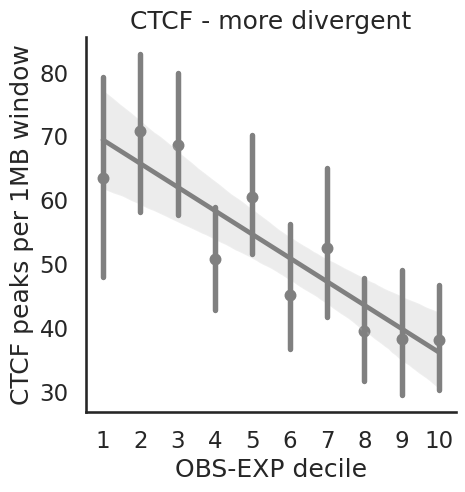

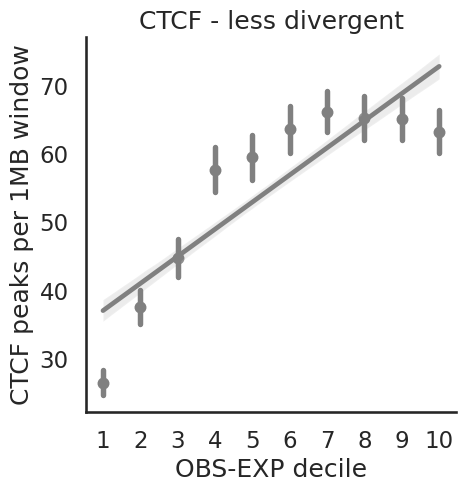

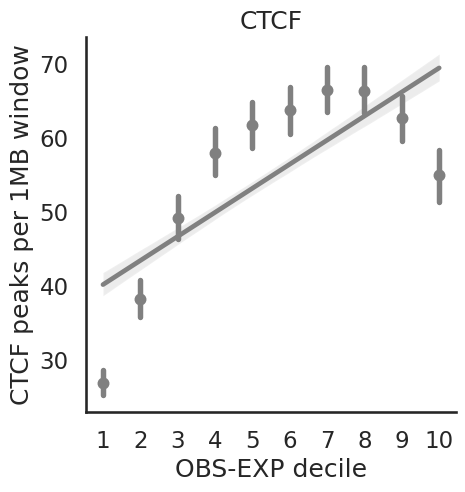

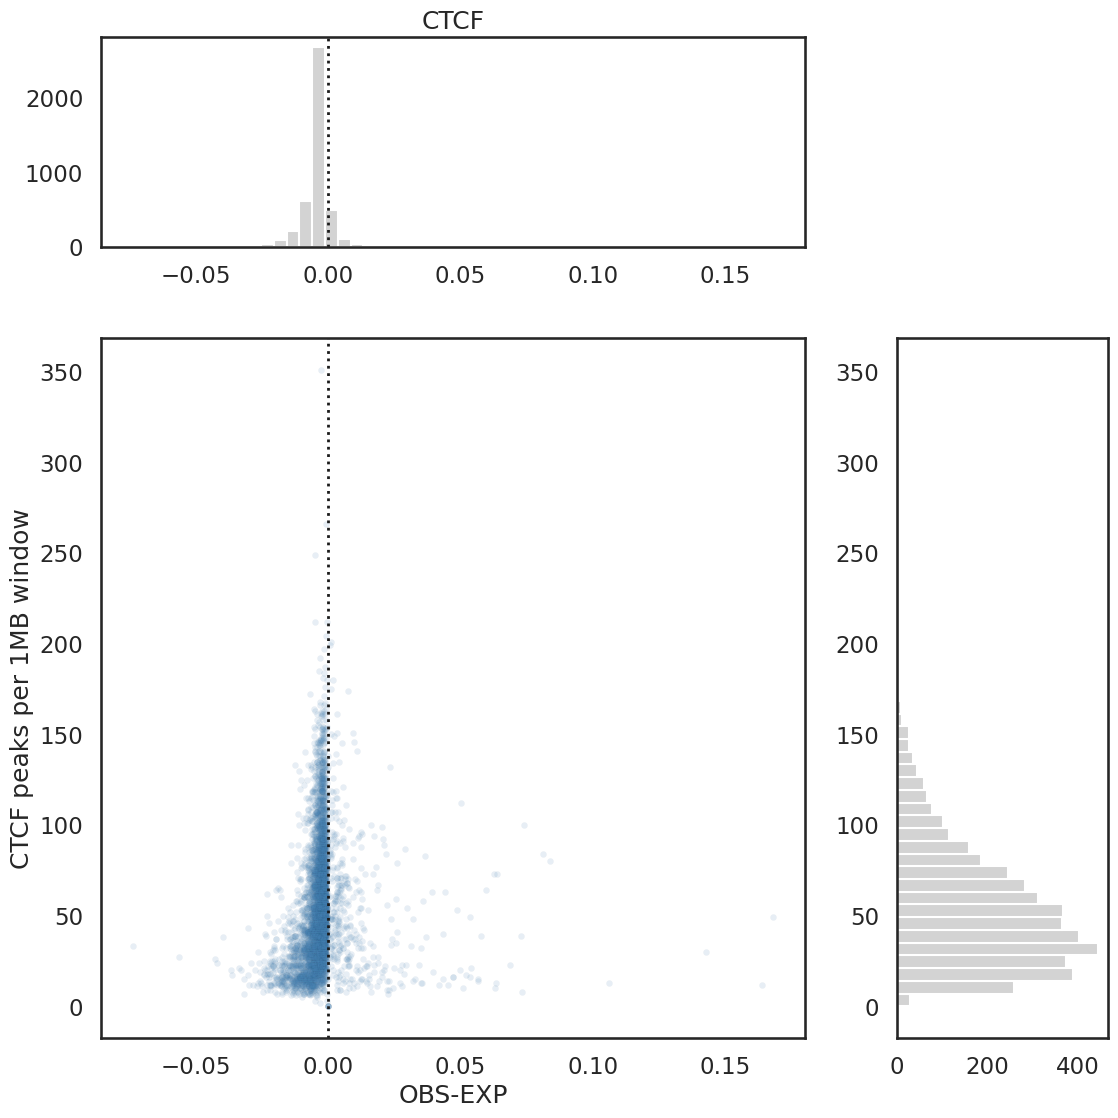

In [304]:
#more
annotation, regions = QuantAnnotate(distStats_more, annot_data = ctcf, annot_type = 'ctcf', quant_bins=10, metric = 'obs-exp')
g = sns.lmplot(x='divergence_percentile_group', y='annot_count', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="OBS-EXP decile", ylabel="CTCF peaks per 1MB window", title='CTCF - more divergent')
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['annot_count'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))

# less
annotation, regions = QuantAnnotate(distStats_less, annot_data = ctcf, annot_type = 'ctcf', quant_bins=10, metric = 'obs-exp')
g = sns.lmplot(x='divergence_percentile_group', y='annot_count', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="OBS-EXP decile", ylabel="CTCF peaks per 1MB window", title='CTCF - less divergent')
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['annot_count'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))

# all
annotation, regions = QuantAnnotate(distStats_sig, annot_data = ctcf, annot_type = 'ctcf', quant_bins=10, metric = 'obs-exp')
g = sns.lmplot(x='divergence_percentile_group', y='annot_count', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="OBS-EXP decile", ylabel="CTCF peaks per 1MB window", title='CTCF')
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['annot_count'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(13,13),gridspec_kw={'width_ratios': [5, 1.5], 'height_ratios': [1.5, 5]})         # Sample figsize in inches
g = sns.scatterplot(x='obs-exp', y='annot_count', data=annotation, alpha=0.13, color='steelblue', ax=ax[1,0],linewidth=.05, edgecolor='k', s=20)#, x_bins=np.arange(0.9965,1,0.00025))  #scatter_kws={'s':2}
_ = g.set(xlabel="OBS-EXP", ylabel="CTCF peaks per 1MB window")
_ = g.set()
_ = g.axvline(x = 0,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1, # Top of the plot
           ls = ':', lw = 2, color = 'k') 


_ = ax[0,0].hist(annotation[['obs-exp']].values.flatten(),color='lightgray', bins=50)
_ = ax[0,0].axvline(x = 0,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1, # Top of the plot
           ls = ':', lw = 2, color = 'k') 
_ = ax[0,0].set(title="CTCF")
# _ = ax[0,0].set(xlim=(0, 0.0503))
# _ = ax[0,0].set( yticks=[0,.05*4873,.1*4873,.15*4873,.2*4873], yticklabels=[0,"",.1,"",0.2], xticklabels='')


_ = ax[1,1].hist(annotation[['annot_count']].values.flatten(), orientation='horizontal', color='lightgray', bins=50)
# _ = ax[1,1].set(ylim=(0, 0.0503))
# _ = ax[1,1].set(xticks=[0,.05*4873,.1*4873,.15*4873,.2*4873], xticklabels=[0,"",.1,"",0.2], yticklabels='')
ax[1,1].set()
ax[0, 1].axis('off')
plt.show()

r2 =  0.04730959734550378 p = 1.752319759767904e-05
r2 =  0.04738882370062135 p = 1.5100963268760488e-44
r2 =  0.02605223593040659 p = 3.3108784174426085e-27


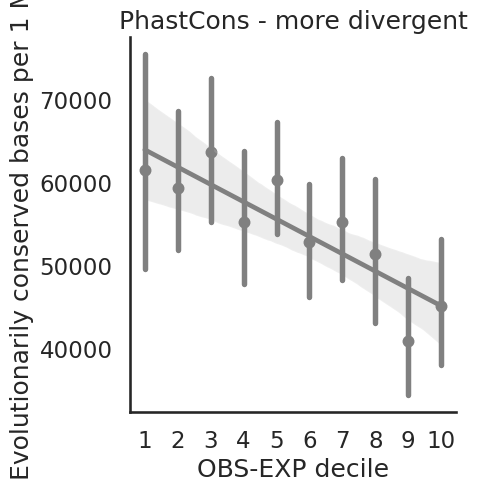

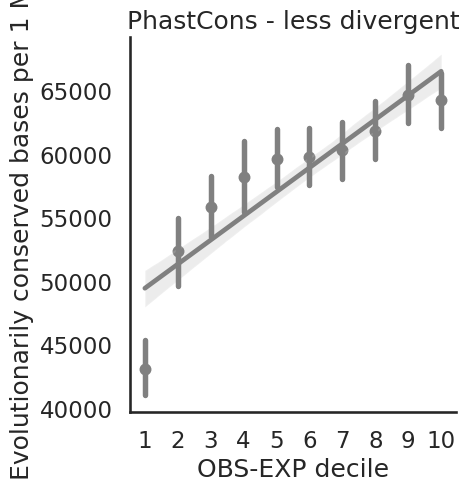

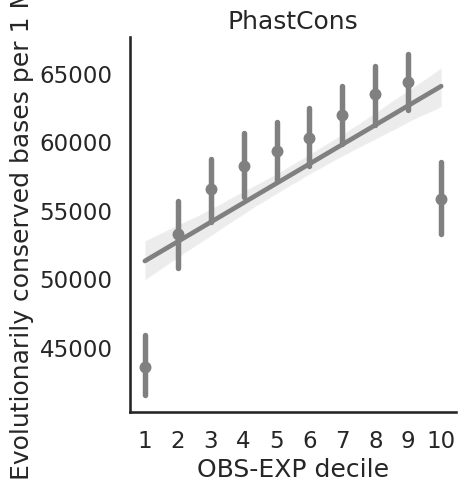

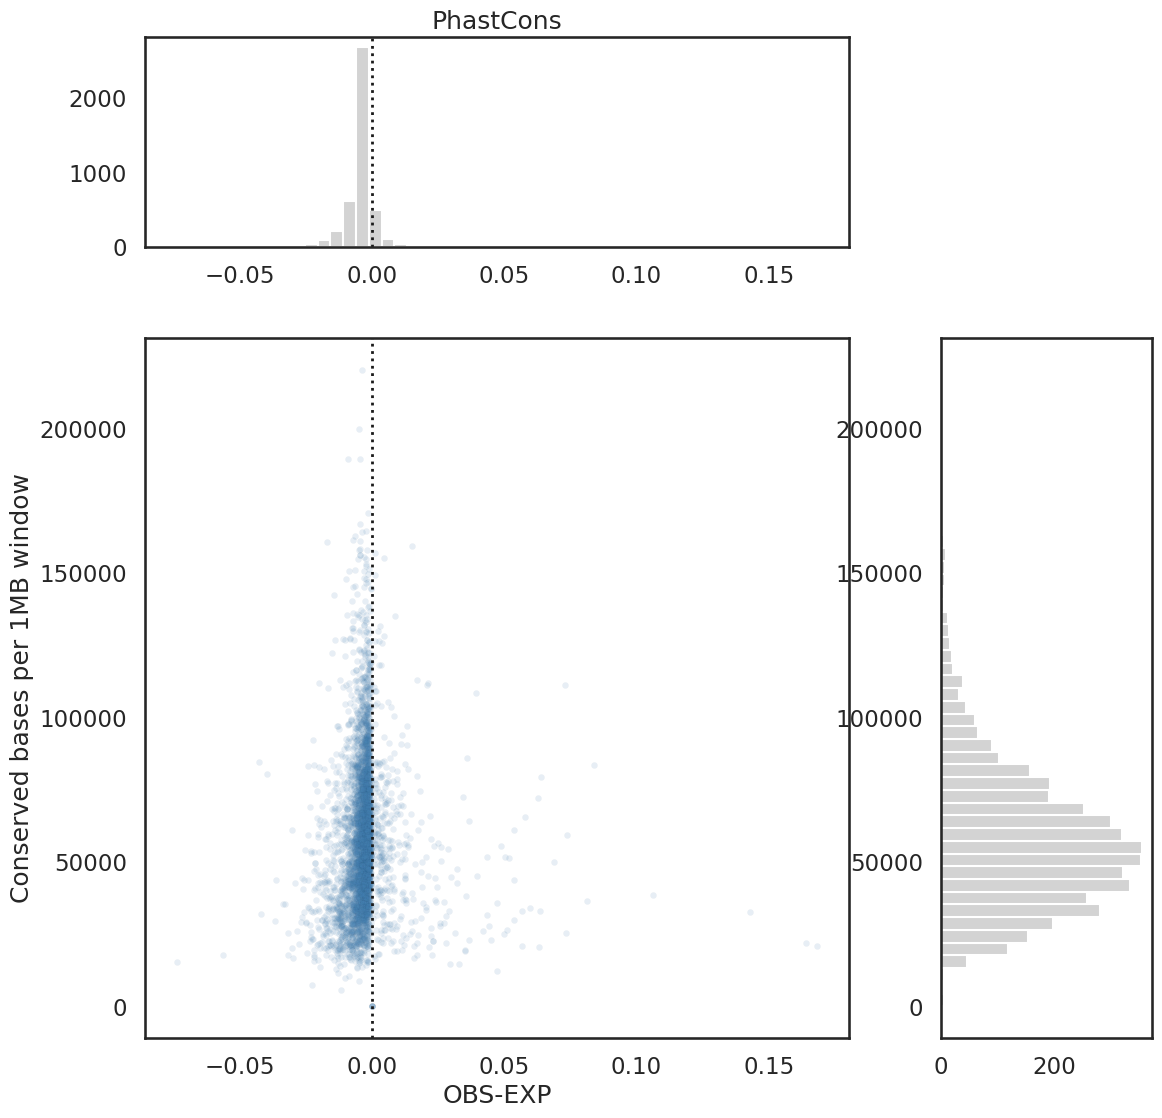

In [306]:
# more
annotation, regions = QuantAnnotate(distStats_more, annot_data = phastCons, annot_type = 'phastCons', quant_bins=10, metric = 'obs-exp')
g = sns.lmplot(x='divergence_percentile_group', y='numBases', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="OBS-EXP decile", ylabel="Evolutionarily conserved bases per 1 MB", title='PhastCons - more divergent')
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['numBases'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))

# less
annotation, regions = QuantAnnotate(distStats_less, annot_data = phastCons, annot_type = 'phastCons', quant_bins=10, metric = 'obs-exp')
g = sns.lmplot(x='divergence_percentile_group', y='numBases', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="OBS-EXP decile", ylabel="Evolutionarily conserved bases per 1 MB", title='PhastCons - less divergent')
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['numBases'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))

# all
annotation, regions = QuantAnnotate(distStats_sig, annot_data = phastCons, annot_type = 'phastCons', quant_bins=10, metric = 'obs-exp')
g = sns.lmplot(x='divergence_percentile_group', y='numBases', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="OBS-EXP decile", ylabel="Evolutionarily conserved bases per 1 MB", title='PhastCons')
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['numBases'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(13,13),gridspec_kw={'width_ratios': [5, 1.5], 'height_ratios': [1.5, 5]})         # Sample figsize in inches
g = sns.scatterplot(x='obs-exp', y='numBases', data=annotation, alpha=0.13, color='steelblue', ax=ax[1,0],linewidth=.05, edgecolor='k', s=20)#, x_bins=np.arange(0.9965,1,0.00025))  #scatter_kws={'s':2}
_ = g.set(xlabel="OBS-EXP", ylabel="Conserved bases per 1MB window")
_ = g.set()
_ = g.axvline(x = 0,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1, # Top of the plot
           ls = ':', lw = 2, color = 'k') 


_ = ax[0,0].hist(annotation[['obs-exp']].values.flatten(),color='lightgray', bins=50)
_ = ax[0,0].axvline(x = 0,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1, # Top of the plot
           ls = ':', lw = 2, color = 'k') 
_ = ax[0,0].set(title="PhastCons")
# _ = ax[0,0].set(xlim=(0, 0.0503))
# _ = ax[0,0].set( yticks=[0,.05*4873,.1*4873,.15*4873,.2*4873], yticklabels=[0,"",.1,"",0.2], xticklabels='')


_ = ax[1,1].hist(annotation[['numBases']].values.flatten(), orientation='horizontal', color='lightgray', bins=50)
# _ = ax[1,1].set(ylim=(0, 0.0503))
# _ = ax[1,1].set(xticks=[0,.05*4873,.1*4873,.15*4873,.2*4873], xticklabels=[0,"",.1,"",0.2], yticklabels='')
ax[1,1].set()
ax[0, 1].axis('off')
plt.show()

### old, splitting populations

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([2085.5 , 2085.52, 2085.54, 2085.56, 2085.58, 2085.6 , 2085.62,
        2085.64, 2085.66, 2085.68, 2085.7 , 2085.72, 2085.74, 2085.76,
        2085.78, 2085.8 , 2085.82, 2085.84, 2085.86, 2085.88, 2085.9 ,
        2085.92, 2085.94, 2085.96, 2085.98, 2086.  , 2086.02, 2086.04,
        2086.06, 2086.08, 2086.1 , 2086.12, 2086.14, 2086.16, 2086.18,
        2086.2 , 2086.22, 2086.24, 2086.26, 2086.28, 2086.3 , 2086.32,
        2086.34, 2086.36, 2086.38, 2086.4 , 2086.42, 2086.44, 2086.46,
        2086.48, 2086.5 ]),
 <BarContainer object of 50 artists>)

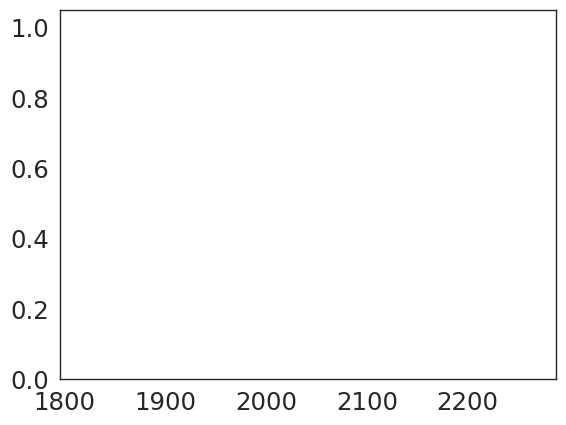

In [82]:
plt.hist(eDists['AFR'].drop(columns=['num_diffs']).loc[( 'chr1',  1048576)], bins = 50, alpha = 0.7)
plt.hist(eDists['AMR'].drop(columns=['num_diffs']).loc[( 'chr1',  1048576)], bins = 50, alpha = 0.7)
plt.hist(eDists['EUR'].drop(columns=['num_diffs']).loc[( 'chr1',  1048576)], bins = 50, alpha = 0.7)
plt.hist(eDists['EAS'].drop(columns=['num_diffs']).loc[( 'chr1',  1048576)], bins = 50, alpha = 0.7)
plt.hist(eDists['SAS'].drop(columns=['num_diffs']).loc[( 'chr1',  1048576)], bins = 50, alpha = 0.7)

In [83]:
kruskal = stats.kruskal(eDists['AFR'].drop(columns=['num_diffs']).loc[( 'chr1',  1048576)], 
                  eDists['AMR'].drop(columns=['num_diffs']).loc[( 'chr1',  1048576)],
                  eDists['EUR'].drop(columns=['num_diffs']).loc[( 'chr1',  1048576)],
                  eDists['EAS'].drop(columns=['num_diffs']).loc[( 'chr1',  1048576)],
                  eDists['SAS'].drop(columns=['num_diffs']).loc[( 'chr1',  1048576)])

In [84]:
kruskal

KruskalResult(statistic=4.0, pvalue=0.40600584970983794)

In [85]:
eDists_windows = dict.fromkeys(windows_to_keep)
weird_windows = []
weird_AFR = []
weird_AMR = []
weird_EUR = []
weird_EAS = []
weird_SAS = []

eDist_stats = pd.DataFrame(index = windows_to_keep, columns = ['kruskal','pval'])
for i in eDists_windows.keys():
    df = pd.DataFrame()
    try:
        df['AFR'] = eDists['AFR'].drop(columns=['num_diffs']).loc[i]
    except:
        weird_AFR.append(i)

    try:
        df['AMR'] = eDists['AMR'].drop(columns=['num_diffs']).loc[i]
    except:
        weird_AMR.append(i)

    try:
        df['EUR'] = eDists['EUR'].drop(columns=['num_diffs']).loc[i]
    except:
        weird_EUR.append(i)
        
    try:
        df['EAS'] = eDists['EAS'].drop(columns=['num_diffs']).loc[i]
    except:
        weird_EAS.append(i)

    try:
        df['SAS'] = eDists['SAS'].drop(columns=['num_diffs']).loc[i]
    except:
        weird_SAS.append(i)

    try:
        kruskal = stats.kruskal(df['AFR'], df['AMR'], df['EUR'], df['EAS'], df['SAS'])
        eDist_stats.loc[i] = kruskal
    except:
        weird_windows.append(i)
    eDists_windows[i] = df


In [86]:
eDist_stats[eDist_stats.pval < 0.05]

,,kruskal,pval
chr,windowStartPos,,


In [87]:
eDist_stats[eDist_stats.pval < (0.05/4873)]

,,kruskal,pval
chr,windowStartPos,,


In [88]:
len(weird_windows)

0

In [89]:
len(weird_AFR)

0

In [90]:
len(weird_AMR)

0

In [91]:
len(weird_EAS)

0

In [92]:
len(weird_SAS)

0

In [93]:
len(weird_EUR)

0

In [94]:
106+22+205

333

In [95]:
weird_pops = weird_AFR + weird_AMR + weird_EUR + weird_EAS + weird_SAS

In [96]:
for i in weird_windows:
    if i not in weird_pops:
        print(i)